![Status: Complete](https://img.shields.io/badge/status-complete-brightgreen)
![Python](https://img.shields.io/badge/python-3.10-blue)
![Coverage](https://img.shields.io/badge/coverage-90%25-green)
![License](https://img.shields.io/badge/license-MIT-green)

<a id="table-of-contents"></a>
# 📖 Classification

[🧭 Problem Statement](#objective)  
  - [📌 What is Classification?](#what-is-classification)

[📂 Data Setup](#data-setup)  
  - [📥 Load Dataset](#load-dataset)  
  - [📊 Data Characteristics Dictionary](#data-characteristics-dictionary)  
  - [🔎 EDA](#eda)  
  - [🛠️ Feature Engineering](#feature-engineering)  
  - [🧹 Preprocessing](#preprocessing)

[🧪 Baseline Classifier Model](#baseline-model)  
  - [📊 Model Evaluation](#evaluation-baseline)  
  - [📉 Confusion Matrix](#confusion-matrix-baseline)  
  - [📈 ROC Curve / AUC](#roc-auc-baseline)  
  - [🧮 Update Best Model Info](#update-best-model)

[🔍 Algorithms](#models)  
  - [📊 Logistic Regression](#logistic-regression)  
  - [🧮 Naive Bayes](#naive-bayes)  
  - [🌳 Decision Tree](#decision-tree)  
  - [🌲 Random Forest](#random-forest)  
  - [🎯 KNN (K-Nearest Neighbors)](#knn)  
  - [📈 SVM (Support Vector Machines)](#svm)  
  - [🚀 XGBoost](#xgboost)  
  - [🧠 Neural Network](#neural-net)

[📊 Model Selection](#model-exploration)  
  - [🧠 Recommend Models](#recommend-models)  
  - [📈 Model Comparison](#model-comparison)  
  - [📊 Feature Importance](#feature-importance)  
  - [🧬 SHAP Values](#shap-values)

[🛠️ Fine-Tune](#tuning)  
  - [🧪 Feature Selection – RFE](#feature-selection-rfe)  
  - [🧪 Feature Selection – RFE + SHAP](#feature-selection-rfe-shap)  
  - [🔎 Grid Search](#grid-search)  
  - [🎲 Randomized Search](#random-search)

[🔀 Ensemble Methods](#ensemble)  
  - [🗳️ Voting Classifier](#voting-ensemble)  
  - [🧬 Stacking Classifier](#stacking-ensemble)  
  - [🪵 Bagging](#bagging)  
  - [🚀 Boosting](#boosting)

[📦 Export & Deployment](#export-deploy)
  - [🧊 Pickling](#pickling)
  - [📊 Monitoring Hooks](#monitoring-hooks)

<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="objective"></a>
# 🧭 Problem Statement



<a id="what-is-classification"></a>
<h4>📌 What is Classification?</h4>

<details><summary><strong>📖 Click to Expand</strong></summary>

<p>Classification is a type of supervised machine learning where the goal is to predict a categorical label for an observation. Given a set of features (input data), the model tries to assign the observation to one of several predefined classes.</p>

<p>Common examples of classification problems include:</p>
<ul>
  <li><strong>Spam detection</strong>: Classifying emails as spam or not.</li>
  <li><strong>Customer churn prediction</strong>: Classifying customers as likely to leave (churn) or stay based on their activity.</li>
  <li><strong>Image recognition</strong>: Classifying images into categories, like identifying animals, vehicles, etc.</li>
</ul>

<p>In classification, the output is discrete (e.g., 'spam' vs 'not spam', 'churn' vs 'no churn'). This contrasts with regression, where the output is continuous (e.g., predicting a house price).</p>

<h5>Key Points</h5>
<ul>
  <li>Supervised learning approach.</li>
  <li>Used for predicting categories.</li>
  <li>Output is discrete (binary or multiclass).</li>
  <li>Examples: email classification, disease diagnosis, fraud detection.</li>
</ul>

</details>


[Back to the top](#table-of-contents)
___

<a id="data-setup"></a>
# 📂 Data Setup



<a id="load-dataset"></a>
#### 📥 Load Dataset



<details><summary><strong>📖 Click to Expand</strong></summary>

<p>In this section, we will begin by preparing the dataset. For simplicity, we'll use a simulated classification dataset generated using the <code>make_classification</code> function from <code>sklearn</code>. This allows us to create a synthetic dataset that is suitable for practicing classification tasks.</p>

<p>We will simulate a dataset with the following properties:</p>
<ul>
  <li>1000 samples (observations)</li>
  <li>10 features (predictors)</li>
  <li>2 informative features (ones that help in prediction)</li>
  <li>2 classes (binary classification problem)</li>
</ul>

<p>Let's generate and take a look at the data.</p>

</details>


In [1]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Machine Learning and Model Evaluation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, TimeSeriesSplit, KFold
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Statistical and Other Utilities
from scipy.stats import zscore
from termcolor import colored

# Visualization
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

# Simulate base classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    weights=[0.7, 0.3],  # simulate class imbalance
    flip_y=0.01,         # 1% label noise
    class_sep=0.8,       # less separation = harder task
    random_state=42
)

# Create DataFrame
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 11)])
target_col = "Target" 
df[target_col] = y

# Inject missing values randomly (e.g., 1% of cells)
# mask = np.random.rand(*df.shape) < 0.01
# df[mask] = np.nan

# Display preview
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,0.959085,-0.066449,0.918572,-0.358079,0.997266,1.181890,-1.415679,-1.210161,-0.828077,1.227274,0
1,-0.910796,-0.566395,-0.940419,0.831617,-1.176962,1.820544,1.552375,-0.984534,0.563896,0.209470,1
2,-0.103769,-0.432774,-0.389454,0.793818,-0.268646,-1.836360,1.039086,-0.246383,-0.858145,-0.297376,1
3,1.580930,2.023606,1.542262,0.006800,-1.607661,0.184741,-2.419427,-0.357445,-1.273127,-0.190039,0
4,-0.006898,-0.711303,0.139918,0.117124,1.536061,0.597538,-0.437329,-0.939156,0.484698,0.236224,0


<a id="data-characteristics-dictionary"></a>
<h4>📊 Data Characteristics Dictionary</h4>

<details><summary><strong>📖 Click to Expand</strong></summary>

<p>This section initializes the <strong>data characteristics dictionary</strong>, which will store various metadata about the dataset, including details about the target variable, features, data size, and linear separability.</p>

<p>The dictionary contains the following key sections:</p>

<ol>
  <li><strong>🎯 Target Variable</strong>:
    <ul>
      <li><strong>Type</strong>: Specifies whether the target variable is <strong>binary</strong> or <strong>multiclass</strong>.</li>
      <li><strong>Imbalance</strong>: Indicates whether the target variable has <strong>class imbalance</strong>.</li>
      <li><strong>Class Imbalance Severity</strong>: Specifies the severity of the imbalance (e.g., <strong>high</strong>, <strong>low</strong>).</li>
    </ul>
  </li>
  <li><strong>🔧 Features</strong>:
    <ul>
      <li><strong>Type</strong>: Describes the type of features in the dataset (e.g., <strong>categorical</strong>, <strong>continuous</strong>, or <strong>mixed</strong>).</li>
      <li><strong>Correlation</strong>: Indicates the correlation between features (e.g., <strong>low</strong>, <strong>medium</strong>, <strong>high</strong>).</li>
      <li><strong>Outliers</strong>: Flag to indicate whether <strong>outliers</strong> are detected in the features.</li>
      <li><strong>Missing Data</strong>: Tracks the percentage of <strong>missing data</strong> or flags missing values.</li>
    </ul>
  </li>
  <li><strong>📈 Data Size</strong>:
    <ul>
      <li><strong>Size</strong>: Contains the <strong>number of samples</strong> (rows) and <strong>number of features</strong> (columns).</li>
    </ul>
  </li>
  <li><strong>🔍 Linear Separability</strong>:
    <ul>
      <li><strong>Linear Separability</strong>: States whether the classes are <strong>linearly separable</strong> (True or False).</li>
    </ul>
  </li>
</ol>

<p>This dictionary will be updated dynamically as we analyze the dataset in subsequent steps. It serves as a <strong>summary of key dataset properties</strong> to help guide further analysis and modeling decisions.</p>

</details>


In [3]:
# Initialize the data characteristics dictionary
data_characteristics = {
    "target_variable": {
        "type": None,  # "binary", "multiclass"
        "imbalance": None,  # True if imbalanced, False otherwise
        "class_imbalance_severity": None  # e.g., "high", "low"
    },
    "features": {
        "type": None,  # "categorical", "continuous", "mixed"
        "correlation": None,  # "low", "medium", "high"
        "outliers": None,  # True if outliers detected, False otherwise
        "missing_data": None  # Percentage of missing data or boolean
    },
    "data_size": None,  # Size of dataset (samples, features)
    "linear_separability": None  # True if classes are linearly separable
}

<a id="eda"></a>
#### 🔎 EDA


In [4]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# If needed, convert X and y to DataFrame and Series
if isinstance(X, np.ndarray):
    X_df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
else:
    X_df = X

if isinstance(y, np.ndarray):
    y_series = pd.Series(y, name="Target")
else:
    y_series = y

# Target-related
target_type = "binary" if y_series.nunique() == 2 else "multiclass"
imbalance_ratio = y_series.value_counts(normalize=True).min()
imbalance_flag = imbalance_ratio < 0.4
imbalance_severity = "high" if imbalance_ratio < 0.2 else "low" if imbalance_ratio < 0.4 else "balanced"

# Feature-related
num_cols = X_df.select_dtypes(include=["number"]).shape[1]
cat_cols = X_df.select_dtypes(exclude=["number"]).shape[1]
feature_type = "continuous" if cat_cols == 0 else "categorical" if num_cols == 0 else "mixed"

missing_pct = X_df.isna().mean().mean()
outlier_flag = any(X_df.apply(lambda col: (col > col.mean() + 3 * col.std()) | (col < col.mean() - 3 * col.std())).sum() > 0)

# Correlation level — only if continuous
if feature_type == "continuous":
    corr_matrix = X_df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    avg_corr = upper_tri.stack().mean()
    corr_level = "high" if avg_corr > 0.7 else "medium" if avg_corr > 0.3 else "low"
else:
    corr_level = "N/A"

# Final update
data_characteristics.update({
    "target_variable": {
        "type": target_type,
        "imbalance": imbalance_flag,
        "class_imbalance_severity": imbalance_severity
    },
    "features": {
        "type": feature_type,
        "correlation": corr_level,
        "outliers": outlier_flag,
        "missing_data": f"{missing_pct:.2%}"
    },
    "data_size": X_df.shape,
    "linear_separability": None
})

In [5]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Infer positive class
positive_class = y_series.unique()[1] if len(y_series.unique()) == 2 else 1

# PCA to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_df)

# Train/test split
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y_series, test_size=0.2, random_state=42, stratify=y_series
)

# Fit linear model
clf = LogisticRegression()
clf.fit(X_pca_train, y_pca_train)
y_pred_pca = clf.predict(X_pca_test)

# F1-based separability score
f1_pca = f1_score(y_pca_test, y_pred_pca, pos_label=positive_class, zero_division=0)
data_characteristics["linear_separability"] = f1_pca > 0.75  # Adjustable threshold

# Optional print
print(f"✅ Linear separability (2D PCA, Logistic F1): {f1_pca:.2f}")
print(f"↪ Updated: linear_separability = {data_characteristics['linear_separability']}")
if f1_pca > 0.85:
    interpretation = "Strong linear separability in 2D — linear models likely to perform well."
elif f1_pca > 0.7:
    interpretation = "Moderate linear separability — linear models may work with tuning."
else:
    interpretation = "Poor linear separability — expect better results with non-linear models."

print(f"📌 Interpretation: {interpretation}")

✅ Linear separability (2D PCA, Logistic F1): 0.74
↪ Updated: linear_separability = False
📌 Interpretation: Moderate linear separability — linear models may work with tuning.


In [6]:
from pprint import pprint
pprint(data_characteristics)

{'data_size': (1000, 10),
 'features': {'correlation': 'low',
              'missing_data': '0.00%',
              'outliers': True,
              'type': 'continuous'},
 'linear_separability': False,
 'target_variable': {'class_imbalance_severity': 'low',
                     'imbalance': True,
                     'type': 'binary'}}


<a id="feature-engineering"></a>
#### 🛠️ Feature Engineering

- *Ommitted Here*

<a id="preprocessing"></a>
#### 🧹 Preprocessing



In [7]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=target_col)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Data split complete:")
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


✅ Data split complete:
Train size: 800, Test size: 200


[Back to the top](#table-of-contents)
___



<a id="baseline-model"></a>
# 🧪 Baseline Classifier Model

<details><summary><strong>📖 Click to Expand</strong></summary>

<p>In this section, we define the <strong>baseline model</strong> for the classification task. The baseline model is typically a <strong>dummy model</strong> that can be used to compare against more sophisticated models. Here, we use the <strong>DummyClassifier</strong>, which predicts the majority class, to set a baseline performance.</p>

<p>The baseline model will help us assess if more advanced models (e.g., Random Forest, SVM) are making meaningful improvements over a simple strategy.</p>

</details>


🧠 Why Track `best_model_info`?

In real-world pipelines, it's critical to:
- Compare models not just by accuracy, but a full suite of metrics.
- Store the actual model object, hyperparameters, and diagnostics in one place.
- Ensure only the **best-performing** model (based on a chosen metric like F1 or AUC) is promoted forward.

In [8]:
# Initialize Central tracker dictionary to track best model details upon iterations
best_model_info = {
    "name": None,
    "model": None,
    "metrics": {
        "train": {
            "accuracy": -np.inf,
            "precision": -np.inf,
            "recall": -np.inf,
            "f1": -np.inf,
            "roc_auc": -np.inf
            # Note: confusion_matrix and classification_report omitted for train
            # because they're redundant and cluttered for internal training fit
        },
        "test": {
            "accuracy": -np.inf,
            "precision": -np.inf,
            "recall": -np.inf,
            "f1": -np.inf,
            "roc_auc": -np.inf,
            "confusion_matrix": None,
            "classification_report": None
        }
    },
    "hyperparameters": None
}

# Dictionary to store all model performance results for comparison
model_results = {}

In [9]:
# Metric to decide which model is "best"
# Common choices (ranked by practical usage):
# 1. "f1"        → balanced precision/recall (default choice, esp. with class imbalance)
# 2. "roc_auc"   → good for imbalanced classes, uses probability scores
# 3. "accuracy"  → only when classes are balanced and all errors are equal
# 4. "precision" → when false positives are costly (e.g., spam detection)
# 5. "recall"    → when false negatives are costly (e.g., fraud, cancer)

# Success metric used to select the best model
success_metric = "f1"  # or "roc_auc", depending on use case
# success_split = "test"  # "train" or "test"

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Fit a dummy classifier as a baseline
dummy_clf = DummyClassifier(strategy="most_frequent")  # or try "stratified", "uniform"
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [11]:
# Predict on both train and test
y_train_pred = dummy_clf.predict(X_train)
y_test_pred = dummy_clf.predict(X_test)

<a id="evaluation-baseline"></a>
#### 📊 Model Evaluation

<details><summary><strong>📖 Click to Expand</strong></summary>

<ul>
  <li><strong>Accuracy</strong>: Overall correctness. Misleading when classes are imbalanced.</li>
  <li><strong>Precision</strong>: Of predicted positives, how many are truly positive? Important when false positives are costly.</li>
  <li><strong>Recall</strong>: Of actual positives, how many did we catch? Crucial when missing positives is expensive.</li>
  <li><strong>F1 Score</strong>: Harmonic mean of precision and recall. Useful when you care about balance.</li>
  <li><strong>ROC AUC</strong>: Probability a random positive ranks above a random negative. Good for probability-based classifiers.</li>
</ul>

</details>

<details><summary><strong>📖 Click to Expand</strong></summary>

<p><strong>Precision, Recall, and F1 Score</strong> are classification metrics that help us understand model performance beyond just accuracy:</p>

<ul>
  <li><strong>Precision</strong>: Of all predicted positives, how many were actually correct? (Low precision = many false alarms)</li>
  <li><strong>Recall</strong>: Of all actual positives, how many did we catch? (Low recall = missed positives)</li>
  <li><strong>F1 Score</strong>: Harmonic mean of precision and recall — useful when classes are imbalanced.</li>
</ul>

<p><strong>Business Perspective</strong>:</p>
<ul>
  <li>If false positives are costly (e.g., spam filters, fraud flags), precision matters more.</li>
  <li>If missing positives is risky (e.g., cancer detection), recall is critical.</li>
  <li>F1 balances both and gives a single, interpretable metric.</li>
</ul>

<p>These metrics are vital when accuracy is misleading — especially in skewed datasets.</p>

</details>


In [12]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Technical output
print("📉 Classification Report\n")
print(classification_report(y_test, y_test_pred))

📉 Classification Report

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Determine positive class once
positive_class = y_train.unique()[1] if len(y_train.unique()) == 2 else 1

def evaluate_model(y_true, y_pred, label="Model"):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=positive_class, average='binary', zero_division=0)
    rec  = recall_score(y_true, y_pred, pos_label=positive_class, average='binary', zero_division=0)
    f1   = f1_score(y_true, y_pred, pos_label=positive_class, average='binary', zero_division=0)

    # Aligned core metrics
    print(f"\n📊 {label} — Performance Summary:")
    print(f"- Accuracy  : {acc :>7.2%} → Overall correctness.")
    print(f"- Precision : {prec:>7.2%} → Of predicted '{positive_class}', how many were right.")
    print(f"- Recall    : {rec :>7.2%} → Of actual '{positive_class}', how many we caught.")
    print(f"- F1 Score  : {f1  :>7.2%} → Balance of precision & recall.")

    # Business interpretation
    print("\n📌 Interpretation:")
    if prec < 0.6:
        print("- High false positives → risky if false alarms are costly.")
    else:
        print("- Precision looks acceptable; false positives under control.")

    if rec < 0.6:
        print("- High false negatives → risky if missing positives is costly.")
    else:
        print("- Recall is strong; model is catching true cases well.")

    print(f"- F1 Score shows overall tradeoff quality: {f1:.2f}")

# Example usage
evaluate_model(y_test, y_test_pred, label="Baseline Classifier")


📊 Baseline Classifier — Performance Summary:
- Accuracy  :  70.00% → Overall correctness.
- Precision :   0.00% → Of predicted '1', how many were right.
- Recall    :   0.00% → Of actual '1', how many we caught.
- F1 Score  :   0.00% → Balance of precision & recall.

📌 Interpretation:
- High false positives → risky if false alarms are costly.
- High false negatives → risky if missing positives is costly.
- F1 Score shows overall tradeoff quality: 0.00


<a id="confusion-matrix-baseline"></a>
#### 📉 Confusion Matrix


<details><summary><strong>📖 Click to Expand</strong></summary>

<p>The confusion matrix is a NxN table that helps us visualize the performance of a classification model.</p>

<p>📖 <strong>Confusion Matrix Terminology:</strong></p>
<ul>
  <li><strong>True Positive (TP)</strong>: Actual = Positive, Predicted = True-ly</li>
  <li><strong>False Positive (FP)</strong>: Actual = Negative, Predicted = False-ly</li>
  <li><strong>True Negative (TN)</strong>: Actual = Negative, Predicted = True-ly</li>
  <li><strong>False Negative (FN)</strong>: Actual = Positive, Predicted = False-ly</li>
</ul>

<pre>
                  Predicted
                ┌───────────────┐
                │     0   │   1 │
         ┌──────┼─────────┼─────┤
Actual   │  0   │   TN    │  FP │  ← Specificity = TN / (TN + FP) = True Negative Rate (TNR)
         │  1   │   FN    │  TP │  ← Recall = TP / (TP + FN) = Sensitivity, TPR, Hit Rate
         └──────┴─────────┴─────┘
                              ↑
                              └─ Precision = TP / (TP + FP) = Positive Predictive Value 
</pre>

</details>


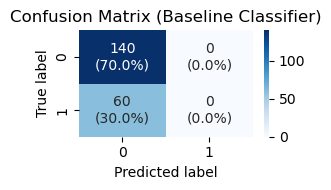

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion(y_true, y_pred, model_name="Model"):
    """
    Plot a confusion matrix with count and percentage annotations.
    Warns if y_pred contains unseen labels not present in y_true.
    """
    # Robust label set
    labels = np.unique(np.concatenate([y_true, y_pred]))
    
    # Check for potential leakage or mismatch
    unseen_preds = set(y_pred) - set(y_true)
    if unseen_preds:
        print(f"\033[91m⚠️ Warning: y_pred contains unseen class labels: {unseen_preds} — "
              f"this may indicate leakage or label mismatch.\033[0m")

    # Compute confusion matrix and percentages
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm)
    cm_perc = cm / cm_sum * 100

    # Annotate with count and %
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            c = cm[i, j]
            p = cm_perc[i, j]
            annot[i, j] = f"{c}\n({p:.1f}%)"

    # Plot
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=annot, fmt="", cmap="Blues", cbar=True,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.tight_layout()
    plt.show()

plot_confusion(y_test, y_test_pred, model_name="Baseline Classifier")


<a id="roc-auc-baseline"></a>
#### 📈 ROC Curve / AUC

<details><summary><strong>📖 Click to Expand</strong></summary>

<p><strong>ROC Curve</strong> (Receiver Operating Characteristic) plots the True Positive Rate (TPR) vs False Positive Rate (FPR) across different threshold values.</p>

<ul>
  <li>A model that randomly guesses would fall along the diagonal (AUC = 0.5)</li>
  <li>A perfect model hugs the top-left corner (AUC = 1.0)</li>
</ul>

<p><strong>AUC (Area Under the Curve)</strong> quantifies overall separability between the two classes:</p>
<ul>
  <li><strong>Technical Insight</strong>: Higher AUC means better discrimination between positive and negative cases.</li>
  <li><strong>Business Relevance</strong>: Especially useful when false positives and false negatives have different costs — like fraud detection, churn prediction, etc.</li>
</ul>

<p>This plot lets stakeholders quickly gauge how good the model is — regardless of classification threshold.</p>

</details>


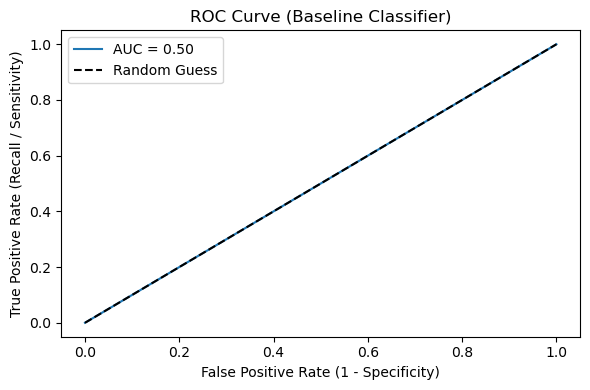

🔹 ROC AUC Score for Baseline Classifier: 0.5000
📌 Interpretation: Model performs at or near random. It cannot meaningfully separate classes.


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_auc(model, X_test, y_test, model_name="Model"):
    """
    Plot ROC curve, print AUC score, and give business-facing interpretation.
    """
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        raise ValueError("Model does not support probability estimates or decision function.")
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    
    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Recall / Sensitivity)")
    plt.title(f"ROC Curve ({model_name})")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Output
    print(f"🔹 ROC AUC Score for {model_name}: {auc_score:.4f}")
    if auc_score <= 0.55:
        print("📌 Interpretation: Model performs at or near random. It cannot meaningfully separate classes.")
    elif auc_score < 0.7:
        print("📌 Interpretation: Some separability, but not reliable yet. Needs improvement.")
    else:
        print("📌 Interpretation: Model is doing a good job distinguishing between classes.")

plot_roc_auc(dummy_clf, X_test, y_test, model_name="Baseline Classifier")


<a id="update-best-model"></a>
#### 🧮 Update Best Model Info


In [16]:
from termcolor import colored
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

def update_best_model(model_name, model_obj, y_train, y_test, y_train_pred, y_test_pred, hyperparameters=None):
    """
    Computes metrics internally, updates best_model_info if model outperforms current best.
    Also logs all model results.
    """
    # Evaluate performance
    metrics = {
        "train": {
            "accuracy": accuracy_score(y_train, y_train_pred),
            "precision": precision_score(y_train, y_train_pred, pos_label=positive_class, zero_division=0),
            "recall": recall_score(y_train, y_train_pred, pos_label=positive_class, zero_division=0),
            "f1": f1_score(y_train, y_train_pred, pos_label=positive_class, zero_division=0),
            "roc_auc": roc_auc_score(y_train, model_obj.predict_proba(X_train)[:, 1])
        },
        "test": {
            "accuracy": accuracy_score(y_test, y_test_pred),
            "precision": precision_score(y_test, y_test_pred, pos_label=positive_class, zero_division=0),
            "recall": recall_score(y_test, y_test_pred, pos_label=positive_class, zero_division=0),
            "f1": f1_score(y_test, y_test_pred, pos_label=positive_class, zero_division=0),
            "roc_auc": roc_auc_score(y_test, model_obj.predict_proba(X_test)[:, 1]),
            "confusion_matrix": confusion_matrix(y_test, y_test_pred),
            "classification_report": classification_report(y_test, y_test_pred, output_dict=True)
        }
    }

    # Compare with current best
    current_score = metrics["test"][success_metric]
    best_score = best_model_info["metrics"]["test"].get(success_metric, -1)
    previous_best = best_model_info["name"] or "None"

    if current_score > best_score:
        best_model_info.update({
            "name": model_name,
            "model": model_obj,
            "metrics": metrics,
            "hyperparameters": hyperparameters or {}
        })
        print(colored(
            f"✅ {model_name} just beat previous best ({previous_best}) → "
            f"{success_metric}: {best_score:.4f} → {current_score:.4f}", "green"))
        # print(f"📊 Current Test Performance:")
        # for metric in ["accuracy", "precision", "recall", "f1", "roc_auc"]:
        #     val = metrics["test"][metric]
        #     print(f"- {metric.capitalize():<9}: {val:.4f}")

    # Log all model results
    model_results[model_name] = {
        "model": model_obj,
        "metrics": metrics,
        "hyperparameters": hyperparameters or {}
    }

In [17]:
update_best_model(
    model_name="DummyClassifier",
    model_obj=dummy_clf,
    y_train=y_train,
    y_test=y_test,
    y_train_pred=y_train_pred,
    y_test_pred=y_test_pred,
    hyperparameters={"strategy": "most_frequent"}
)

✅ DummyClassifier just beat previous best (None) → f1: -inf → 0.0000


/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# from pprint import pprint
# pprint(best_model_info)
# pprint(model_results)

# import json
# print(json.dumps(best_model_info, indent=2, default=str))
# print(json.dumps(model_results, indent=2, default=str))


[Back to the top](#table-of-contents)
___




<a id="models"></a>
# 🔍 Algorithms



<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🧠 Model Selection Table (Based on Data Characteristics)

| Target Type | Linearly Separable | Correlation | Imbalance | Recommended Models                  | Notes                                                              |
|-------------|---------------------|-------------|-----------|-------------------------------------|---------------------------------------------------------------------|
| Binary      | ✅ True             | Low         | ✅ True   | XGBoost > Random Forest            | Use tree-based models with class weights or resampling.             |
| Binary      | ✅ True             | Low         | ❌ False  | Logistic Regression > SVM          | Start with simple linear models. Use as benchmark.                 |
| Binary      | ✅ True             | High        | ✅ True   | XGBoost > Random Forest            | Use tree-based models with class weights or resampling.             |
| Binary      | ✅ True             | High        | ❌ False  | Logistic Regression > SVM          | Start with simple linear models. Use as benchmark.                 |
| Binary      | ❌ False            | Low         | ✅ True   | XGBoost > Random Forest            | Boosting or RF with class weights to handle imbalance + complexity. |
| Binary      | ❌ False            | Low         | ❌ False  | Random Forest > Decision Tree      | Simple non-linear trees likely sufficient. Avoid tuning-heavy models. |
| Binary      | ❌ False            | High        | ✅ True   | XGBoost > Random Forest            | Boosting or RF with class weights to handle imbalance + complexity. |
| Binary      | ❌ False            | High        | ❌ False  | Random Forest > Decision Tree      | Simple non-linear trees likely sufficient. Avoid tuning-heavy models. |
| Multiclass  | ✅ True             | Low         | ✅ True   | XGBoost > Logistic Regression      | Use OvR strategy with LR/XGB. Watch for class separation.           |
| Multiclass  | ✅ True             | Low         | ❌ False  | XGBoost > Logistic Regression      | Use OvR strategy with LR/XGB. Watch for class separation.           |
| Multiclass  | ✅ True             | High        | ✅ True   | XGBoost > Logistic Regression      | Use OvR strategy with LR/XGB. Watch for class separation.           |
| Multiclass  | ✅ True             | High        | ❌ False  | XGBoost > Logistic Regression      | Use OvR strategy with LR/XGB. Watch for class separation.           |
| Multiclass  | ❌ False            | Low         | ✅ True   | Neural Network > KNN               | Use Neural Net or KNN. Prioritize decision boundary complexity.     |
| Multiclass  | ❌ False            | Low         | ❌ False  | Neural Network > KNN               | Use Neural Net or KNN. Prioritize decision boundary complexity.     |
| Multiclass  | ❌ False            | High        | ✅ True   | XGBoost > Random Forest            | Tree-based models preferred. Skip preprocessing of collinear features. |
| Multiclass  | ❌ False            | High        | ❌ False  | XGBoost > Random Forest            | Tree-based models preferred. Skip preprocessing of collinear features. |
</details>

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🧠 Model Selection Flowchart (Based on Data Characteristics)

```text
🎯 Target Type = Binary?
  ├── ✅ Yes
  │   ├── 📈 Linearly Separable?
  │   │   ├── ✅ Yes
  │   │   │   ├── 🧬 Feature Type = Categorical?
  │   │   │   │   ├── ✅ ------------------------------------------> 🌲 Random Forest > 🚀 XGBoost
  │   │   │   │   └── ❌ → 📉 Correlation = High?
  │   │   │   │         ├── ✅ ------------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │   │   │   │         └── ❌ → ⚠️ Missing Data?
  │   │   │   │               ├── ✅ ------------------------------> 🚀 XGBoost > 🧠 Neural Network
  │   │   │   │               └── ❌ ⚠️ Outliers Present?
  │   │   │   │                     ├── ✅ → ⚖️ Imbalanced?
  │   │   │   │                     │   ├── ✅ --------------------> 🚀 XGBoost > 🌲 Random Forest
  │   │   │   │                     │   └── ❌ --------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   │   │   │                     └── ❌ ------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   │   │   └── ❌ → 📉 Correlation = High?
  │   │   │         ├── ✅ ----------------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │   │   │         └── ❌ → ⚠️ Missing Data?
  │   │   │               ├── ✅ ----------------------------------> 🚀 XGBoost > 🧠 Neural Network
  │   │   │               └── ❌ → ⚠️ Outliers Present?
  │   │   │                     ├── ✅ → ⚖️ Imbalanced?
  │   │   │                     │   ├── ✅ ------------------------> 🚀 XGBoost > 🌲 Random Forest
  │   │   │                     │   └── ❌ ------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   │   │                     └── ❌ ----------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   │   └── ❌ → ⚠️ Missing Data?
  │   │         ├── ✅ --------------------------------------------> 🚀 XGBoost > 🧠 Neural Network
  │   │         └── ❌ → ⚠️ Outliers Present?
  │   │               ├── ✅ → ⚖️ Imbalanced?
  │   │               │   ├── ✅ ----------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │   │               │   └── ❌ ----------------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   │               └── ❌ --------------------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   └── ❌ No (Multiclass)
  │         ├── 📈 Linearly Separable?
  │         │   ├── ✅ Yes
  │         │   │   ├── 🧬 Feature Type = Categorical?
  │         │   │   │   ├── ✅ ------------------------------------> 🌲 Random Forest > 🚀 XGBoost
  │         │   │   │   └── ❌ → 📉 Correlation = High?
  │         │   │   │         ├── ✅ ------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │         │   │   │         └── ❌ → ⚠️ Missing Data?
  │         │   │   │               ├── ✅ ------------------------> 🚀 XGBoost > 🧠 Neural Network
  │         │   │   │               └── ❌ → ⚠️ Outliers Present?
  │         │   │   │                     ├── ✅ → ⚖️ Imbalanced?
  │         │   │   │                     │   ├── ✅ --------------> 🚀 XGBoost > 🌲 Random Forest
  │         │   │   │                     │   └── ❌ --------------> 🌲 Random Forest > 🌳 Decision Tree
  │         │   │   │                     └── ❌ ------------------> 🌲 Random Forest > 🌳 Decision Tree
  │         │   │   └── ❌ → 📉 Correlation = High?
  │         │   │         ├── ✅ ----------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │         │   │         └── ❌ → ⚠️ Missing Data?
  │         │   │               ├── ✅ ----------------------------> 🚀 XGBoost > 🧠 Neural Network
  │         │   │               └── ❌ → ⚠️ Outliers Present?
  │         │   │                     ├── ✅ → ⚖️ Imbalanced?
  │         │   │                     │   ├── ✅ ------------------> 🚀 XGBoost > 🌲 Random Forest
  │         │   │                     │   └── ❌ ------------------> 🌲 Random Forest > 🌳 Decision Tree
  │         │   │                     └── ❌ ----------------------> 🌲 Random Forest > 🌳 Decision Tree
  │         │   └── ❌ → 📉 Correlation = High?
  │         │         ├── ✅ → ------------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │         │         └── ❌ → ⚠️ Missing Data?
  │         │               ├── ✅ --------------------------------> 🚀 XGBoost > 🧠 Neural Network
  │         │               └── ❌ → ⚠️ Outliers Present?
  │         │                     ├── ✅ → ⚖️ Imbalanced?
  │         │                     │   ├── ✅ ----------------------> 🚀 XGBoost > 🌲 Random Forest
  │         │                     │   └── ❌ ----------------------> 🌲 Random Forest > 🌳 Decision Tree
  │         │                     └── ❌ --------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │         └── ❌ 🧬 Feature Type = Categorical?
  │               ├── ✅ ------------------------------------------> 🌲 Random Forest > 🚀 XGBoost
  │               └── ❌ → 📉 Correlation = High?
  │                     ├── ✅ ------------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │                     └── ❌ → ⚠️ Missing Data?
  │                           ├── ✅ ------------------------------> 🚀 XGBoost > 🧠 Neural Network
  │                           └── ❌ → ⚠️ Outliers Present?
  │                                 ├── ✅ → ⚖️ Imbalanced?
  │                                 │   ├── ✅ --------------------> 🚀 XGBoost > 🌲 Random Forest
  │                                 │   └── ❌ --------------------> 🌲 Random Forest > 🌳 Decision Tree
  │                                 └── ❌ ------------------------> 🌲 Random Forest > 🌳 Decision Tree
  └── End
```


</details>

<a id="logistic-regression"></a>
#### 📊 Logistic Regression



<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔍 What is Logistic Regression?</h5>

<p>Despite the name, <strong>Logistic Regression</strong> is used for classification — not regression.<br>
It predicts the <strong>probability</strong> that an observation belongs to a certain class (e.g., 0 or 1).<br>
Under the hood, it fits a weighted formula to the input features, applies a sigmoid function, and outputs a value between 0 and 1.</p>

<blockquote>
  <p><strong>Example:</strong><br>
  A model might say there's a <strong>78% chance</strong> this customer will churn.<br>
  If that crosses a certain threshold (say, 50%), we classify it as “Yes.”</p>
</blockquote>

<h5>✅ Pros vs ❌ Cons</h5>

<table>
  <thead>
    <tr>
      <th>Pros</th>
      <th>Cons</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Fast and efficient</td>
      <td>Assumes linear relationship (log-odds)</td>
    </tr>
    <tr>
      <td>Easy to interpret (feature weights)</td>
      <td>Doesn’t handle complex patterns well</td>
    </tr>
    <tr>
      <td>Works well with small datasets</td>
      <td>Sensitive to multicollinearity</td>
    </tr>
    <tr>
      <td>Outputs probabilities</td>
      <td>May underperform on nonlinear data</td>
    </tr>
  </tbody>
</table>

<h5>🧠 When to Use</h5>

<ul>
  <li>You want a <strong>quick baseline</strong> with interpretable output</li>
  <li>You care about <strong>probabilities</strong>, not just labels</li>
  <li>Your data is fairly <strong>linearly separable</strong></li>
  <li>The number of features is small to medium</li>
</ul>

<h5>⚠️ Pitfalls & Hacks</h5>

<ul>
  <li><strong>Pitfall</strong>: If features are highly correlated (multicollinearity), the model may become unstable. Use regularization (e.g., L2 penalty).</li>
  <li><strong>Hack</strong>: For imbalanced datasets, adjust the threshold or use <code>class_weight='balanced'</code> to avoid bias toward the majority class.</li>
  <li><strong>Tip</strong>: Standardize features before training, especially if using regularization.</li>
</ul>

</details>


<a id="naive-bayes"></a>
#### 🧮 Naive Bayes



<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔍 What is Naive Bayes?</h5>

<p>Naive Bayes is a family of <strong>probabilistic classifiers</strong> based on Bayes’ Theorem.<br>
It assumes that all features are <strong>independent</strong> of each other — which is rarely true in practice, but the model still performs surprisingly well.</p>

<p>It calculates the probability of each class given the input features and picks the class with the highest likelihood.</p>

<blockquote>
  <p><strong>Example:</strong><br>
  “Given these symptoms, what’s the most probable disease?” — Naive Bayes is widely used in text classification, spam detection, and medical diagnosis.</p>
</blockquote>

<h5>✅ Pros vs ❌ Cons</h5>

<table>
  <thead>
    <tr>
      <th>Pros</th>
      <th>Cons</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Very fast and scalable</td>
      <td>Assumes feature independence (naive)</td>
    </tr>
    <tr>
      <td>Handles high-dimensional data well</td>
      <td>May underperform with correlated inputs</td>
    </tr>
    <tr>
      <td>Simple and interpretable</td>
      <td>Struggles with numeric feature scaling</td>
    </tr>
    <tr>
      <td>Works well with text data</td>
      <td>Outputs are often overconfident</td>
    </tr>
  </tbody>
</table>

<h5>🧠 When to Use</h5>

<ul>
  <li>You’re working with <strong>text</strong> (e.g., spam filters, sentiment)</li>
  <li>You want a <strong>fast baseline</strong></li>
  <li>You’re dealing with <strong>high-dimensional</strong>, sparse features (like TF-IDF)</li>
  <li>You have clean categorical or binary features</li>
</ul>

<h5>⚠️ Pitfalls & Hacks</h5>

<ul>
  <li><strong>Pitfall</strong>: Doesn’t handle continuous features naturally — convert them to bins or use GaussianNB.</li>
  <li><strong>Hack</strong>: Apply <strong>Laplace smoothing</strong> to handle zero probabilities in unseen combinations.</li>
  <li><strong>Tip</strong>: Don’t expect high accuracy on raw numeric data — it shines in text-like scenarios.</li>
</ul>

</details>


<a id="decision-tree"></a>
#### 🌳 Decision Tree

<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔍 What is a Decision Tree?</h5>

<p>A Decision Tree splits data into branches based on feature values, creating a flowchart-like structure.<br>
Each split is chosen to maximize class separation (typically using Gini impurity or entropy).<br>
The result is a set of human-readable rules — like:<br>
“If age &lt; 30 and income &gt; 50K → likely to churn.”</p>

<p>It’s intuitive and easy to explain, even to non-technical stakeholders.</p>

<h5>✅ Pros vs ❌ Cons</h5>

<table>
  <thead>
    <tr>
      <th>Pros</th>
      <th>Cons</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Easy to visualize and interpret</td>
      <td>Prone to overfitting on noisy data</td>
    </tr>
    <tr>
      <td>No need for feature scaling</td>
      <td>Can create unstable splits</td>
    </tr>
    <tr>
      <td>Captures non-linear relationships</td>
      <td>Doesn’t generalize well on small data</td>
    </tr>
    <tr>
      <td>Works for both numeric and categorical</td>
      <td>Can be biased toward dominant features</td>
    </tr>
  </tbody>
</table>

<h5>🧠 When to Use</h5>

<ul>
  <li>You need a model that’s <strong>explainable</strong> (e.g., in regulated domains)</li>
  <li>Your data has <strong>mixed types</strong> (numeric + categorical)</li>
  <li>You want to <strong>prototype quickly</strong> and understand feature importance</li>
  <li>You’re okay with less predictive power in favor of interpretability</li>
</ul>

<h5>⚠️ Pitfalls & Hacks</h5>

<ul>
  <li><strong>Pitfall</strong>: Deep trees can memorize the training data — always prune or set <code>max_depth</code>.</li>
  <li><strong>Hack</strong>: Use as a weak learner inside ensembles (like Random Forest or XGBoost) to improve performance.</li>
  <li><strong>Tip</strong>: Use feature importance from trees to guide feature selection for other models.</li>
</ul>

</details>


<a id="random-forest"></a>
#### 🌲 Random Forest

<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔍 What is a Random Forest?</h5>

<p>Random Forest is an <strong>ensemble method</strong> that builds many decision trees and combines their outputs.<br>
Each tree sees a random subset of the data and features, making the forest <strong>diverse and robust</strong>.</p>

<p>It works by aggregating the predictions of multiple trees (majority vote for classification), reducing the overfitting risk of a single decision tree.</p>

<blockquote>
  <p>Think of it as a crowd of weak models working together to make better predictions.</p>
</blockquote>

<h5>✅ Pros vs ❌ Cons</h5>

<table>
  <thead>
    <tr>
      <th>Pros</th>
      <th>Cons</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Strong performance out of the box</td>
      <td>Less interpretable than a single tree</td>
    </tr>
    <tr>
      <td>Handles non-linearities and interactions</td>
      <td>Slower for real-time predictions</td>
    </tr>
    <tr>
      <td>Resistant to overfitting</td>
      <td>May require tuning to perform well</td>
    </tr>
    <tr>
      <td>Works well with large feature spaces</td>
      <td>Not ideal when interpretability is key</td>
    </tr>
  </tbody>
</table>

<h5>🧠 When to Use</h5>

<ul>
  <li>You need a <strong>reliable general-purpose model</strong> with minimal tuning</li>
  <li>You want to <strong>improve stability</strong> over a single decision tree</li>
  <li>Your data is <strong>tabular and structured</strong></li>
  <li>You care more about <strong>performance</strong> than full interpretability</li>
</ul>

<h5>⚠️ Pitfalls & Hacks</h5>

<ul>
  <li><strong>Pitfall</strong>: May become large and slow — tune <code>n_estimators</code> and <code>max_depth</code> if needed</li>
  <li><strong>Hack</strong>: Use <code>feature_importances_</code> to find influential variables</li>
  <li><strong>Tip</strong>: Avoid one-hot encoding with high-cardinality features — use label encoding instead</li>
</ul>

</details>


<a id="knn"></a>
#### 🎯 KNN (K-Nearest Neighbors)

<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔍 What is K-Nearest Neighbors?</h5>

<p>KNN is a <strong>non-parametric</strong>, instance-based learning method.<br>
It doesn’t learn a model during training — instead, it stores the data.<br>
At prediction time, it looks at the <strong>K most similar observations</strong> (neighbors) and assigns the class based on majority vote.</p>

<p>Similarity is usually measured using <strong>Euclidean distance</strong> (or other distance metrics for different data types).</p>

<blockquote>
  <p><strong>Example:</strong><br>
  “To predict a label for this point, look at its 5 closest data points and choose the most common class.”</p>
</blockquote>

<h5>✅ Pros vs ❌ Cons</h5>

<table>
  <thead>
    <tr>
      <th>Pros</th>
      <th>Cons</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Simple and intuitive</td>
      <td>Slow at prediction time (no training step)</td>
    </tr>
    <tr>
      <td>No training required</td>
      <td>Struggles with high-dimensional data</td>
    </tr>
    <tr>
      <td>Captures local patterns</td>
      <td>Requires feature scaling</td>
    </tr>
    <tr>
      <td>Flexible distance metrics</td>
      <td>Memory-intensive with large datasets</td>
    </tr>
  </tbody>
</table>

<h5>🧠 When to Use</h5>

<ul>
  <li>You have <strong>low-dimensional</strong>, clean data</li>
  <li>You want to <strong>prototype quickly</strong> with minimal assumptions</li>
  <li>You care about <strong>local behavior</strong> rather than global rules</li>
  <li>Interpretability is less important than flexibility</li>
</ul>

<h5>⚠️ Pitfalls & Hacks</h5>

<ul>
  <li><strong>Pitfall</strong>: Distance metrics break down in high-dimensional space (curse of dimensionality)</li>
  <li><strong>Hack</strong>: Use <code>StandardScaler</code> or <code>MinMaxScaler</code> to normalize features before fitting</li>
  <li><strong>Tip</strong>: Tune <code>k</code> using cross-validation; odd numbers help avoid ties in binary classification</li>
</ul>

</details>


<a id="svm"></a>
#### 📈 SVM (Support Vector Machines)

<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔍 What is SVM?</h5>

<p>Support Vector Machines (SVM) are <strong>margin-based classifiers</strong> that try to find the best boundary (hyperplane) that separates classes.<br>
SVM focuses on <strong>support vectors</strong> — the critical data points closest to the boundary — to maximize the margin between classes.</p>

<p>It can handle <strong>non-linear patterns</strong> using kernel tricks (e.g., RBF kernel), making it flexible for complex data.</p>

<blockquote>
  <p>Think of it as drawing the widest possible gap between two classes while avoiding overlap.</p>
</blockquote>

<h5>✅ Pros vs ❌ Cons</h5>

<table>
  <thead>
    <tr>
      <th>Pros</th>
      <th>Cons</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Works well in high-dimensional spaces</td>
      <td>Slow on large datasets</td>
    </tr>
    <tr>
      <td>Effective for non-linear boundaries</td>
      <td>Requires careful parameter tuning</td>
    </tr>
    <tr>
      <td>Robust to overfitting (with regularization)</td>
      <td>Not intuitive to interpret</td>
    </tr>
    <tr>
      <td>Supports different kernels</td>
      <td>Doesn’t scale well with noisy data</td>
    </tr>
  </tbody>
</table>

<h5>🧠 When to Use</h5>

<ul>
  <li>Your data is <strong>high-dimensional</strong>, but you want a <strong>non-linear model</strong></li>
  <li>You need a <strong>strong classifier</strong> and have time to tune hyperparameters</li>
  <li>Dataset is <strong>moderate in size</strong> and reasonably clean</li>
  <li>You care about maximizing <strong>margin of separation</strong></li>
</ul>

<h5>⚠️ Pitfalls & Hacks</h5>

<ul>
  <li><strong>Pitfall</strong>: Doesn't output probabilities by default — use <code>probability=True</code> in <code>SVC</code> if needed</li>
  <li><strong>Hack</strong>: Use <strong>RBF kernel</strong> as a good starting point for non-linear problems</li>
  <li><strong>Tip</strong>: Always standardize features — SVM is sensitive to feature scale</li>
</ul>

</details>


<a id="xgboost"></a>
#### 🚀 XGBoost



<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔍 What is XGBoost?</h5>

<p>XGBoost (Extreme Gradient Boosting) is a powerful <strong>boosted tree ensemble</strong> method.<br>
Unlike Random Forest (which builds trees in parallel), XGBoost builds trees <strong>sequentially</strong> — each new tree tries to fix the errors of the previous one.</p>

<p>It uses <strong>gradient descent</strong> to minimize loss, with regularization to prevent overfitting.<br>
XGBoost is known for its <strong>speed, accuracy, and efficiency</strong>, making it a go-to model in many Kaggle competitions and production systems.</p>

<h5>✅ Pros vs ❌ Cons</h5>

<table>
  <thead>
    <tr>
      <th>Pros</th>
      <th>Cons</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>High predictive accuracy</td>
      <td>Harder to interpret</td>
    </tr>
    <tr>
      <td>Built-in regularization (less overfitting)</td>
      <td>More complex than basic tree models</td>
    </tr>
    <tr>
      <td>Fast and scalable</td>
      <td>Requires tuning for best performance</td>
    </tr>
    <tr>
      <td>Handles missing data automatically</td>
      <td>May overfit small/noisy datasets</td>
    </tr>
  </tbody>
</table>

<h5>🧠 When to Use</h5>

<ul>
  <li>You need <strong>top-tier performance</strong> on structured/tabular data</li>
  <li>You’re working with <strong>noisy or complex relationships</strong></li>
  <li>You’re okay with a black-box model in exchange for results</li>
  <li>You want built-in tools for <strong>feature importance</strong>, early stopping, etc.</li>
</ul>

<h5>⚠️ Pitfalls & Hacks</h5>

<ul>
  <li><strong>Pitfall</strong>: Easy to overfit if <code>n_estimators</code> is too high — always monitor with validation</li>
  <li><strong>Hack</strong>: Use <code>early_stopping_rounds</code> during training to auto-pick optimal iteration</li>
  <li><strong>Tip</strong>: Start with basic settings and use <code>GridSearchCV</code> or <code>Optuna</code> for tuning</li>
</ul>

</details>


<a id="neural-net"></a>
#### 🧠 Neural Network

<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔍 What is a Neural Network?</h5>

<p>A Neural Network is a layered structure of interconnected "neurons" inspired by the human brain.<br>
Each neuron applies a weighted transformation followed by a non-linear activation, allowing the model to learn <strong>complex, non-linear patterns</strong> in the data.</p>

<p>Even a basic feedforward neural network (also called Multi-Layer Perceptron or MLP) can approximate intricate decision boundaries — making it powerful but harder to interpret.</p>

<blockquote>
  <p>Think of it as a flexible function builder that learns patterns layer by layer.</p>
</blockquote>

<h5>✅ Pros vs ❌ Cons</h5>

<table>
  <thead>
    <tr>
      <th>Pros</th>
      <th>Cons</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Can model complex, non-linear relationships</td>
      <td>Requires lots of data and tuning</td>
    </tr>
    <tr>
      <td>Works well on both tabular and image/text data</td>
      <td>Not interpretable out of the box</td>
    </tr>
    <tr>
      <td>Scales with data and compute</td>
      <td>Can overfit if not regularized</td>
    </tr>
    <tr>
      <td>Highly customizable architectures</td>
      <td>Slower to train, harder to debug</td>
    </tr>
  </tbody>
</table>

<h5>🧠 When to Use</h5>

<ul>
  <li>You have <strong>enough data</strong> and want to model <strong>complex interactions</strong></li>
  <li>You're comfortable with longer training and tuning</li>
  <li>You care more about <strong>predictive power</strong> than explainability</li>
  <li>You're building pipelines that could benefit from <strong>deep learning extensions</strong> later</li>
</ul>

<h5>⚠️ Pitfalls & Hacks</h5>

<ul>
  <li><strong>Pitfall</strong>: Prone to overfitting — always use dropout, regularization, or early stopping</li>
  <li><strong>Hack</strong>: Use a simple architecture (1–2 hidden layers) for structured/tabular data</li>
  <li><strong>Tip</strong>: Standardize inputs and tune learning rate; training can otherwise stall or explode</li>
</ul>

</details>


[Back to the top](#table-of-contents)
___

<a id="model-exploration"></a>
# 📊 Model Selection

<details><summary><strong>📖 Click to Expand</strong></summary>

</details>

<details><summary><strong>📖 Click to Expand</strong></summary>

Start
  │
  ├── 🎯 Target Type = Binary?
  │     │
  │     ├── ✅ Yes
  │     │     ├── 📈 Linearly Separable?
  │     │     │     ├── ✅ Yes
  │     │     │     │     ├── 🧬 Feature Type = Categorical?
  │     │     │     │     │     ├── ✅ ─────────────→ 🌲 Random Forest / 🚀 XGBoost
  │     │     │     │     │     └── ❌
  │     │     │     │     │           ├── 📉 Correlation = High?
  │     │     │     │     │           │     ├── ✅ ─────────────→ ❌ Avoid NB / LR
  │     │     │     │     │           │     └── ❌
  │     │     │     │     │           │           ├── ⚠️ Missing Data?
  │     │     │     │     │           │           │     ├── ✅ ─────────────→ 🚀 XGBoost / CatBoost
  │     │     │     │     │           │           │     └── ❌
  │     │     │     │     │           │           │           ├── ⚠️ Outliers?
  │     │     │     │     │           │           │           │     ├── ✅ ─────────────→ 🚀 XGBoost / 🌲 Random Forest
  │     │     │     │     │           │           │           │     └── ❌ ─────────────→ 🤖 Logistic Regression / 🧭 SVM
  │     │     │     │     │           │           │           └── End
  │     │     │     │     │           │           └── End
  │     │     │     │     │           └── End
  │     │     │     │     └── End
  │     │     │     └── ❌ No
  │     │     │           ├── 🧬 Feature Type = Categorical?
  │     │     │           │     ├── ✅ ─────────────→ 🌲 Random Forest / 🚀 XGBoost
  │     │     │           │     └── ❌
  │     │     │           │           ├── 📉 Correlation = High?
  │     │     │           │           │     ├── ✅ ─────────────→ ❌ Avoid NB / LR
  │     │     │           │           │     └── ❌
  │     │     │           │           │           ├── ⚠️ Missing Data?
  │     │     │           │           │           │     ├── ✅ ─────────────→ 🚀 XGBoost / CatBoost
  │     │     │           │           │           │     └── ❌
  │     │     │           │           │           │           ├── ⚠️ Outliers?
  │     │     │           │           │           │           │     ├── ✅ ─────────────→ 🚀 XGBoost / 🌲 Random Forest
  │     │     │           │           │           │           │     └── ❌ ─────────────→ 🧠 Neural Network / 🎯 KNN
  │     │     │           │           │           │           └── End
  │     │     │           │           │           └── End
  │     │     │           │           └── End
  │     │     │           └── End
  │     │     └── End
  │     └── ❌ No (Multiclass)
  │           ├── 📈 Linearly Separable?
  │           │     ├── ✅ Yes
  │           │     │     ├── 🧬 Feature Type = Categorical?
  │           │     │     │     ├── ✅ ─────────────→ 🌲 Random Forest / 🚀 XGBoost
  │           │     │     │     └── ❌
  │           │     │     │           ├── 📉 Correlation = High?
  │           │     │     │           │     ├── ✅ ─────────────→ ❌ Avoid NB / LR
  │           │     │     │           │     └── ❌
  │           │     │     │           │           ├── ⚠️ Missing Data?
  │           │     │     │           │           │     ├── ✅ ─────────────→ 🚀 XGBoost / CatBoost
  │           │     │     │           │           │     └── ❌
  │           │     │     │           │           │           ├── ⚠️ Outliers?
  │           │     │     │           │           │           │     ├── ✅ ─────────────→ 🚀 XGBoost / 🌲 Random Forest
  │           │     │     │           │           │           │     └── ❌ ─────────────→ 🤖 Logistic Regression (OvR) / 🧭 SVM
  │           │     │     │           │           │           └── End
  │           │     │     │           │           └── End
  │           │     │     │           └── End
  │           │     │     └── End
  │           │     └── ❌ No
  │           │           ├── 🧬 Feature Type = Categorical?
  │           │           │     ├── ✅ ─────────────→ 🌲 Random Forest / 🚀 XGBoost
  │           │           │     └── ❌
  │           │           │           ├── 📉 Correlation = High?
  │           │           │           │     ├── ✅ ─────────────→ ❌ Avoid NB / LR
  │           │           │           │     └── ❌
  │           │           │           │           ├── ⚠️ Missing Data?
  │           │           │           │           │     ├── ✅ ─────────────→ 🚀 XGBoost / CatBoost
  │           │           │           │           │     └── ❌
  │           │           │           │           │           ├── ⚠️ Outliers?
  │           │           │           │           │           │     ├── ✅ ─────────────→ 🚀 XGBoost / 🌲 Random Forest
  │           │           │           │           │           │     └── ❌ ─────────────→ 🧠 Neural Network / 🎯 KNN
  │           │           │           │           │           └── End
  │           │           │           │           └── End
  │           │           │           └── End
  │           │           └── End
  │           └── End
  └── 🧪 Evaluate Top 3 Recommended Models
</details>


<a id="recommend-models"></a>
#### 🧠 Recommend Models


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

model_registry = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),  # needed for ROC AUC
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Neural Network": MLPClassifier(max_iter=1000)
}


In [20]:
def recommend_models(data_characteristics, verbose=True):
    """
    Scores and ranks models based on data characteristics.
    Prints the recommended order and rationales.
    """
    from termcolor import colored

    score = {}
    rationale = {}
    
    # Extract characteristics
    target_info = data_characteristics.get("target_variable", {})
    feature_info = data_characteristics.get("features", {})
    is_linear = data_characteristics.get("linear_separability", False)

    imbalance = target_info.get("imbalance", False)
    imbalance_severity = target_info.get("class_imbalance_severity", "")
    feature_type = feature_info.get("type", "")
    corr = feature_info.get("correlation", "")
    outliers = feature_info.get("outliers", False)

    # --- Logistic Regression ---
    score["Logistic Regression"] = 2
    rationale["Logistic Regression"] = ["Good for linearly separable, numeric data"]
    if is_linear:
        score["Logistic Regression"] += 3
        rationale["Logistic Regression"].append("Linear separability is True")
    if feature_type == "continuous":
        score["Logistic Regression"] += 1
        rationale["Logistic Regression"].append("Features are continuous")
    if outliers:
        score["Logistic Regression"] -= 1
        rationale["Logistic Regression"].append("Sensitive to outliers")

    # --- Naive Bayes ---
    score["Naive Bayes"] = 1
    rationale["Naive Bayes"] = ["Good for categorical, independent features"]
    if feature_type == "categorical":
        score["Naive Bayes"] += 2
        rationale["Naive Bayes"].append("Features are categorical")
    if corr == "low":
        score["Naive Bayes"] += 1
        rationale["Naive Bayes"].append("Feature correlation is low")
    if corr == "high":
        score["Naive Bayes"] -= 2
        rationale["Naive Bayes"].append("Correlation is high → violates independence")

    # --- Decision Tree ---
    score["Decision Tree"] = 2
    rationale["Decision Tree"] = ["Fast, flexible, handles most data types"]
    if corr == "high":
        score["Decision Tree"] += 1
        rationale["Decision Tree"].append("Can exploit feature redundancy")
    if outliers:
        score["Decision Tree"] += 1
        rationale["Decision Tree"].append("Robust to outliers")

    # --- Random Forest ---
    score["Random Forest"] = 3
    rationale["Random Forest"] = ["Strong baseline, handles imbalance + outliers"]
    if outliers:
        score["Random Forest"] += 1
        rationale["Random Forest"].append("Handles outliers well")
    if imbalance:
        score["Random Forest"] += 1
        rationale["Random Forest"].append("Bootstrap helps with imbalance")

    # --- KNN ---
    score["KNN"] = 1
    rationale["KNN"] = ["Simple, distance-based"]
    if feature_type == "continuous":
        score["KNN"] += 1
        rationale["KNN"].append("Distance-based → works better on continuous features")
    if outliers:
        score["KNN"] -= 2
        rationale["KNN"].append("Very sensitive to outliers")
    if imbalance:
        score["KNN"] -= 1
        rationale["KNN"].append("Imbalance skews neighbors")

    # --- SVM ---
    score["SVM"] = 2
    rationale["SVM"] = ["Margin-based model"]
    if is_linear:
        score["SVM"] += 2
        rationale["SVM"].append("Linear separability is True")
    if imbalance:
        score["SVM"] -= 1
        rationale["SVM"].append("Needs tuning to handle imbalance")
    if feature_type == "continuous":
        score["SVM"] += 1
        rationale["SVM"].append("Requires numeric features")

    # --- Neural Network ---
    score["Neural Network"] = 2
    rationale["Neural Network"] = ["Flexible but sensitive"]
    if imbalance_severity == "high":
        score["Neural Network"] += 1
        rationale["Neural Network"].append("Can learn from imbalance if tuned")
    if outliers:
        score["Neural Network"] -= 1
        rationale["Neural Network"].append("Can be unstable with outliers")

    # --- XGBoost ---
    score["XGBoost"] = 4
    rationale["XGBoost"] = ["Strong general-purpose model"]
    if outliers:
        score["XGBoost"] += 1
        rationale["XGBoost"].append("Robust to outliers")
    if imbalance:
        score["XGBoost"] += 1
        rationale["XGBoost"].append("scale_pos_weight helps with imbalance")
    if corr == "high":
        score["XGBoost"] += 1
        rationale["XGBoost"].append("Handles redundant features well")

    # Sort by descending score
    ranked_models = sorted(score.items(), key=lambda x: x[1], reverse=True)
    ranked_model_names = [model for model, _ in ranked_models]

    # Filter and reorder model_registry
    ranked_registry = {name: model_registry[name] for name in ranked_model_names if name in model_registry}

    if verbose:
        print("🧠 Recommended Model Evaluation Order:\n")
        for i, name in enumerate(ranked_model_names, 1):
            if name in model_registry:
                prefix = colored(f"{i}. {name} (Score: {score[name]})", "green") if i <= 3 else f"{i}. {name} (Score: {score[name]})"
                print(prefix)
                for reason in rationale[name]:
                    print(f"   ↪ {reason}")
        print()

    return ranked_model_names, ranked_registry


In [21]:
_, model_registry = recommend_models(data_characteristics, model_registry)

# model_registry

🧠 Recommended Model Evaluation Order:

1. XGBoost (Score: 6)
   ↪ Strong general-purpose model
   ↪ Robust to outliers
   ↪ scale_pos_weight helps with imbalance
2. Random Forest (Score: 5)
   ↪ Strong baseline, handles imbalance + outliers
   ↪ Handles outliers well
   ↪ Bootstrap helps with imbalance
3. Decision Tree (Score: 3)
   ↪ Fast, flexible, handles most data types
   ↪ Robust to outliers
4. Logistic Regression (Score: 2)
   ↪ Good for linearly separable, numeric data
   ↪ Features are continuous
   ↪ Sensitive to outliers
5. Naive Bayes (Score: 2)
   ↪ Good for categorical, independent features
   ↪ Feature correlation is low
6. SVM (Score: 2)
   ↪ Margin-based model
   ↪ Needs tuning to handle imbalance
   ↪ Requires numeric features
7. Neural Network (Score: 1)
   ↪ Flexible but sensitive
   ↪ Can be unstable with outliers
8. KNN (Score: -1)
   ↪ Simple, distance-based
   ↪ Distance-based → works better on continuous features
   ↪ Very sensitive to outliers
   ↪ Imbalance s

<a id="model-comparison"></a>
#### 📈 Model Comparison


🔧 Training: XGBoost

📊 XGBoost — Performance Summary:
- Accuracy  :  93.00% → Overall correctness.
- Precision :  89.66% → Of predicted '1', how many were right.
- Recall    :  86.67% → Of actual '1', how many we caught.
- F1 Score  :  88.14% → Balance of precision & recall.

📌 Interpretation:
- Precision looks acceptable; false positives under control.
- Recall is strong; model is catching true cases well.
- F1 Score shows overall tradeoff quality: 0.88


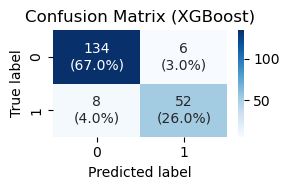

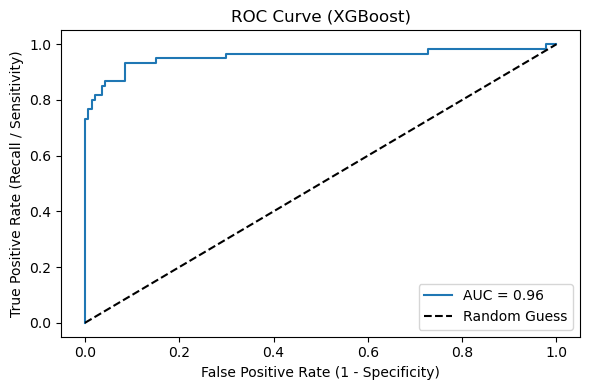

🔹 ROC AUC Score for XGBoost: 0.9554
📌 Interpretation: Model is doing a good job distinguishing between classes.
✅ XGBoost just beat previous best (DummyClassifier) → f1: 0.0000 → 0.8814
————————————————————————————————————————————————————————————————————————————————

🔧 Training: Random Forest

📊 Random Forest — Performance Summary:
- Accuracy  :  91.00% → Overall correctness.
- Precision :  88.89% → Of predicted '1', how many were right.
- Recall    :  80.00% → Of actual '1', how many we caught.
- F1 Score  :  84.21% → Balance of precision & recall.

📌 Interpretation:
- Precision looks acceptable; false positives under control.
- Recall is strong; model is catching true cases well.
- F1 Score shows overall tradeoff quality: 0.84


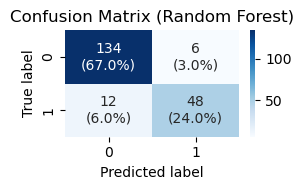

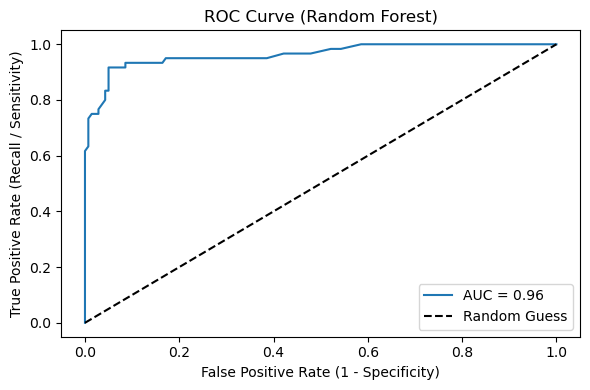

🔹 ROC AUC Score for Random Forest: 0.9631
📌 Interpretation: Model is doing a good job distinguishing between classes.
————————————————————————————————————————————————————————————————————————————————

🔧 Training: Decision Tree

📊 Decision Tree — Performance Summary:
- Accuracy  :  85.00% → Overall correctness.
- Precision :  69.23% → Of predicted '1', how many were right.
- Recall    :  90.00% → Of actual '1', how many we caught.
- F1 Score  :  78.26% → Balance of precision & recall.

📌 Interpretation:
- Precision looks acceptable; false positives under control.
- Recall is strong; model is catching true cases well.
- F1 Score shows overall tradeoff quality: 0.78


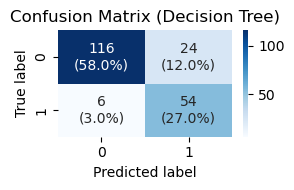

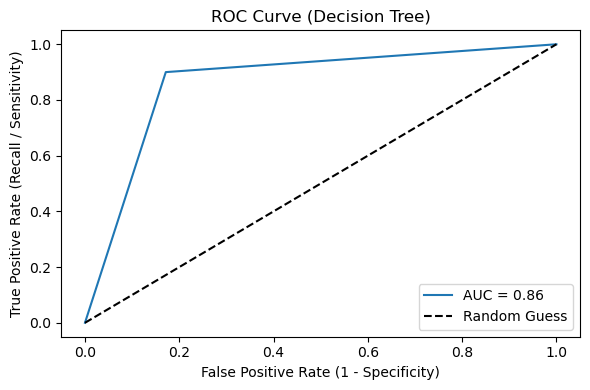

🔹 ROC AUC Score for Decision Tree: 0.8643
📌 Interpretation: Model is doing a good job distinguishing between classes.
————————————————————————————————————————————————————————————————————————————————


In [22]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix, log_loss
)

top_k = 3
for name in list(model_registry.keys())[:top_k]:
    # We evaluate only the top 3 recommended models (ranked earlier) for focused comparison.
    print(f"\n🔧 Training: {name}")

    # Fit and predict
    model = model_registry[name]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation summary
    evaluate_model(y_test, y_test_pred, label=name)
    plot_confusion(y_test, y_test_pred, model_name=name)
    plot_roc_auc(model, X_test, y_test, model_name=name)

    # Track and log best model
    update_best_model(
        model_name=name,
        model_obj=model,
        y_train=y_train,
        y_test=y_test,
        y_train_pred=y_train_pred,
        y_test_pred=y_test_pred
    )

    print("—" * 80)  # horizontal line


In [23]:
# from pprint import pprint
# pprint(best_model_info)
# pprint(model_results)

In [24]:
# Print current best model based on success_metric
print(f"\n🏆 Best model so far: {best_model_info['name']} "
      f"({success_metric.upper()} = {best_model_info['metrics']['test'][success_metric]:.4f})")

print(f"\n📊 Model Ranking by {success_metric.upper()}:\n")
ranked = sorted(
    model_results.items(),
    key=lambda x: x[1]["metrics"]["test"][success_metric],
    reverse=True
)

for i, (name, result) in enumerate(ranked, 1):
    score = result["metrics"]["test"][success_metric]
    print(f"{i}. {name:<20} {success_metric}: {score:.4f}")



🏆 Best model so far: XGBoost (F1 = 0.8814)

📊 Model Ranking by F1:

1. XGBoost              f1: 0.8814
2. Random Forest        f1: 0.8421
3. Decision Tree        f1: 0.7826
4. DummyClassifier      f1: 0.0000


In [25]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd

# Extract test metrics
df_results = pd.DataFrame({
    model_name: data["metrics"]["test"]
    for model_name, data in model_results.items()
}).T

# Original metrics you'd like to plot
desired_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'specificity']

# Filter only those that exist in df_results
metrics = [m for m in desired_metrics if m in df_results.columns]

# Create subplot layout
rows = (len(metrics) + 1) // 2
fig = sp.make_subplots(rows=rows, cols=2, subplot_titles=[m.upper() for m in metrics])

# Plot each available metric
for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    fig.add_trace(
        go.Bar(
            x=df_results.index,
            y=df_results[metric],
            name=metric,
            text=pd.to_numeric(df_results[metric], errors="coerce").round(3),
            textposition="auto"
        ),
        row=row+1, col=col+1
    )

fig.update_layout(
    height=300 * rows,
    width=1000,
    title_text="Model Comparison by Metric",
    showlegend=False
)

fig.show()


<a id="feature-importance"></a>
<h4>📊 Feature Importance</h4>

<details><summary><strong>📖 Click to Expand</strong></summary>

<p>Feature importance tells us <strong>which variables the model relied on most</strong> to make predictions.<br>
It’s like asking, “What factors influenced the decision the most?”</p>

<p>In tree-based models like Random Forest or XGBoost, it’s calculated based on how often and how effectively a feature was used to split the data.</p>

<p>This is useful for:</p>
<ul>
  <li>Understanding the model’s decision logic</li>
  <li>Identifying key business drivers</li>
  <li>Eliminating irrelevant features</li>
</ul>

</details>


In [26]:
# best_model_info

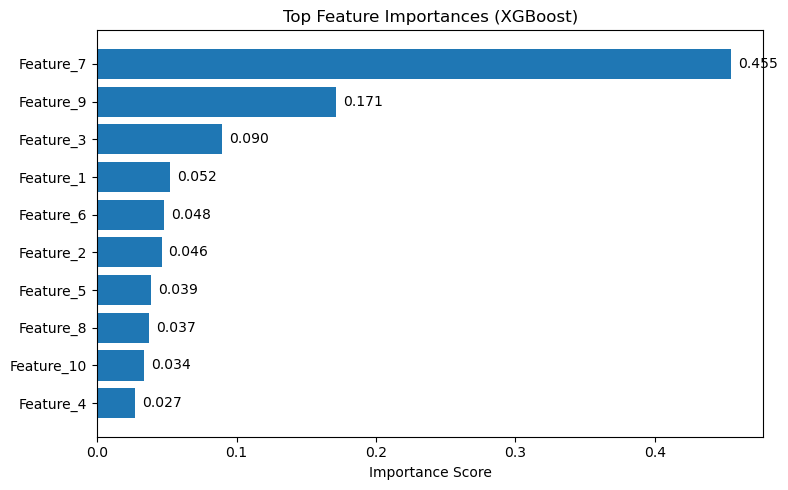

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(model=None, feature_names=None, top_n=10, model_name=None):
    """
    Plots top N feature importances.
    Defaults to best_model_info['model'] unless overridden.
    Optionally takes a model_name for the plot title.
    """
    if model is None:
        model = best_model_info["model"]
        model_name = best_model_info.get("name", "Best Model") if model_name is None else model_name
    else:
        model_name = model_name or "Selected Model"

    if feature_names is None:
        feature_names = X_train.columns

    if not hasattr(model, "feature_importances_"):
        raise ValueError("Model does not support feature_importances_")

    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": model.feature_importances_
    }).sort_values(by="Importance", ascending=False).head(top_n)

    plt.figure(figsize=(8, 5))
    plt.barh(importance_df["Feature"][::-1], importance_df["Importance"][::-1])
    for i, (feature, importance) in enumerate(zip(importance_df["Feature"][::-1], importance_df["Importance"][::-1])):
        plt.text(importance + 0.005, i, f"{importance:.3f}", va='center')
    plt.title(f"Top Feature Importances ({model_name})")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

    return list(importance_df["Feature"])

# ✅ Default: plot for best model
imp_ranked = plot_feature_importance()

# 🛠️ Optional: override model + title
# alt_model = model_results["Random Forest"]["model"]
# imp_ranked = plot_feature_importance(model=alt_model, model_name="Random Forest")


<a id="shap-values"></a>
<h4>🧬 SHAP Values</h4>

<details><summary><strong>📖 Click to Expand</strong></summary>

<p>SHAP (SHapley Additive exPlanations) values explain <strong>how much each feature contributed</strong> to a specific prediction — positively or negatively.</p>

<p>It’s like breaking down a credit score:<br>
<em>“Age added +12 points, income removed -5 points…”</em></p>

<p>SHAP is model-agnostic and gives <strong>local explanations</strong> (for individual predictions) and <strong>global insights</strong> (feature impact across all predictions).</p>

<p>Useful for:</p>
<ul>
  <li>Auditing high-stakes predictions</li>
  <li>Building trust with stakeholders</li>
  <li>Diagnosing model behavior case-by-case</li>
</ul>

</details>


[22:12:53] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


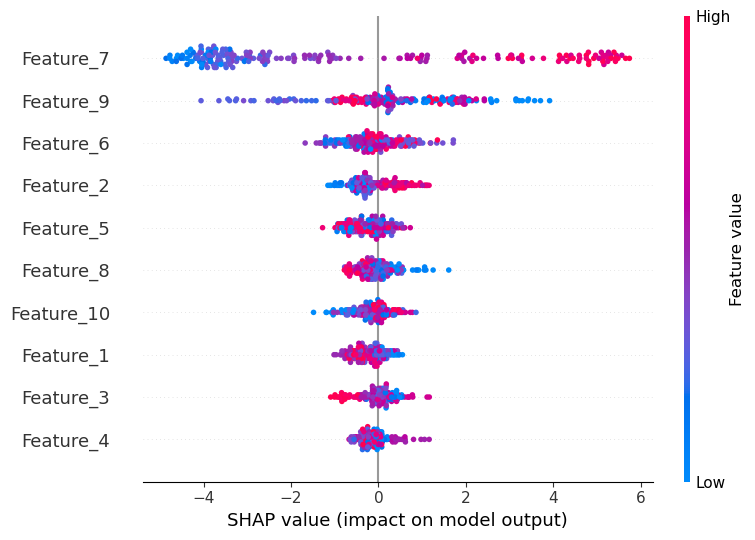


📌 SHAP Summary for XGBoost:
- Each bar shows how much that feature influences the model’s decision.
- Features at the top are the most impactful across all predictions.
- Blue/red indicate direction: does the feature push prediction up or down?
- Helps us understand *why* the model is confident — not just *what* it predicts.


In [28]:
import shap

def plot_shap_summary_tree(model=None, X=None, model_name=None):
    """
    Plot SHAP summary for tree-based models (RandomForest, XGBoost).
    Defaults to best_model_info['model'] and X_test.
    """
    if model is None:
        model = best_model_info["model"]
        model_name = model_name or best_model_info.get("name", "Best Model")
    else:
        model_name = model_name or "Selected Model"

    if X is None:
        X = X_test

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # For binary classification, use shap_values[1]
    if isinstance(shap_values, list) and len(shap_values) == 2:
        shap_values = shap_values[1]

    shap.summary_plot(shap_values, X)

    print(f"\n📌 SHAP Summary for {model_name}:")
    print("- Each bar shows how much that feature influences the model’s decision.")
    print("- Features at the top are the most impactful across all predictions.")
    print("- Blue/red indicate direction: does the feature push prediction up or down?")
    print("- Helps us understand *why* the model is confident — not just *what* it predicts.")

    shap_df = pd.DataFrame(np.abs(shap_values), columns=X.columns).mean().sort_values(ascending=False)
    return list(shap_df.index)

# ✅ Default: SHAP for best model
shap_ranked = plot_shap_summary_tree()

# 🛠️ Optional: SHAP for any other model
# alt_model = model_results["Random Forest"]["model"]
# shap_ranked = plot_shap_summary_tree(model=alt_model, model_name="Random Forest")

[Back to the top](#table-of-contents)
___

<a id="tuning"></a>
# 🛠️ Fine-Tune

<details><summary><strong>📖 Click to Expand</strong></summary>

<ul>
  <li>Fine-tuning helps unlock the model’s full potential by finding better hyperparameter values.</li>
  <li>It improves accuracy, recall, and other metrics without changing the model type.</li>
  <li>We typically tune the best-performing model from the baseline round (Random Forest in our case).</li>
  <li>Two common methods: Grid Search (exhaustive) and Randomized Search (faster, approximate).</li>
</ul>

</details>


<a id="feature-selection-rfe"></a>
#### 🧪 Feature Selection – RFE

In [29]:
if False:
    from sklearn.feature_selection import RFE

    # Use full X_train
    X_full = X_train.copy()
    model = best_model_info["model"]

    # Choose how many features to keep (optional: all, top 50%, or fixed)
    n_to_select = max(1, X_full.shape[1] // 2)  # or change to any value

    # Run RFE
    selector = RFE(estimator=model, n_features_to_select=n_to_select, step=1)
    selector.fit(X_full, y_train)

    # Final selected features
    selected_features = list(X_full.columns[selector.support_])
    print(f"✅ RFE selected features (no filtering): {selected_features}")


<a id="feature-selection-rfe-shap"></a>
#### 🧪 Feature Selection – RFE + SHAP

In [30]:
from sklearn.base import clone
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
import shap
import numpy as np

def shap_guided_backward_elimination(
    model, X, y,
    shap_ranked=None,
    metric_name=None,
    drop_threshold=0.005,
    min_features=1,
    verbose=True
):
    """
    SHAP-guided backward elimination with early stopping.
    Drops features by SHAP rank until performance drops significantly or hits min_features.
    """
    model_base = clone(model)
    X_curr = X.copy()

    # Determine metric
    metric_name = metric_name or success_metric
    metric_func = {
        "f1": f1_score,
        "accuracy": accuracy_score,
        "precision": precision_score,
        "recall": recall_score,
        "roc_auc": roc_auc_score
    }.get(metric_name)

    if metric_func is None:
        raise ValueError(f"Unsupported metric: {metric_name}")

    # Get SHAP-ranked features if not provided
    if shap_ranked is None:
        explainer = shap.TreeExplainer(model_base.fit(X_curr, y))
        shap_values = explainer.shap_values(X_curr)
        if isinstance(shap_values, list) and len(shap_values) == 2:
            shap_values = shap_values[1]
        shap_importance = np.abs(shap_values).mean(axis=0)
        shap_ranked = X_curr.columns[np.argsort(shap_importance)[::-1]].tolist()
    else:
        shap_ranked = shap_ranked.copy()

    # Initialize tracking
    score_history = []
    previous_score = None

    while len(shap_ranked) >= min_features:
        model = clone(model_base)
        model.fit(X_curr[shap_ranked], y)
        y_pred = model.predict(X_curr[shap_ranked])
        score = metric_func(y, y_pred, zero_division=0)
        score_history.append((len(shap_ranked), score, shap_ranked.copy()))

        if verbose:
            feat_list = ", ".join(shap_ranked)
            print(f"✅ {len(shap_ranked)} features → {metric_name}: {score:.4f} → [{feat_list}]")

        # Early stop if score drops significantly
        if previous_score is not None and (previous_score - score) > drop_threshold:
            if verbose:
                print(f"🛑 Stopping early: {metric_name} dropped from {previous_score:.4f} to {score:.4f}")
            break

        previous_score = score
        shap_ranked.pop()  # Drop lowest-ranked SHAP feature

    if not score_history:
        raise ValueError("No elimination steps executed — shap_ranked too short or invalid inputs.")

    # Best configuration
    tolerance = 0.01  # Accept within 1% drop of best score
    best_score = max(score_history, key=lambda x: x[1])[1]
    # Keep all configs that are within tolerance
    candidates = [cfg for cfg in score_history if (best_score - cfg[1]) <= tolerance]
    # Pick one with the fewest features
    best_config = min(candidates, key=lambda x: x[0])
    print(f"\n🎯 Best config: {len(best_config[2])} features → {metric_name}: {best_config[1]:.4f}")
    return best_config[2], score_history


In [31]:
final_features, history = shap_guided_backward_elimination(
    model=best_model_info["model"],
    X=X_train,
    y=y_train,
    shap_ranked=shap_ranked
)
final_features

X_train_full = X_train.copy() # retaining copies for future reference
X_test_full = X_test.copy() # retaining copies for future reference
X_train = X_train[final_features]
X_test  = X_test[final_features]


✅ 10 features → f1: 1.0000 → [Feature_7, Feature_9, Feature_6, Feature_2, Feature_5, Feature_8, Feature_10, Feature_1, Feature_3, Feature_4]
✅ 9 features → f1: 1.0000 → [Feature_7, Feature_9, Feature_6, Feature_2, Feature_5, Feature_8, Feature_10, Feature_1, Feature_3]
✅ 8 features → f1: 1.0000 → [Feature_7, Feature_9, Feature_6, Feature_2, Feature_5, Feature_8, Feature_10, Feature_1]
✅ 7 features → f1: 1.0000 → [Feature_7, Feature_9, Feature_6, Feature_2, Feature_5, Feature_8, Feature_10]
✅ 6 features → f1: 1.0000 → [Feature_7, Feature_9, Feature_6, Feature_2, Feature_5, Feature_8]
✅ 5 features → f1: 1.0000 → [Feature_7, Feature_9, Feature_6, Feature_2, Feature_5]
✅ 4 features → f1: 1.0000 → [Feature_7, Feature_9, Feature_6, Feature_2]
✅ 3 features → f1: 1.0000 → [Feature_7, Feature_9, Feature_6]
✅ 2 features → f1: 0.9896 → [Feature_7, Feature_9]
🛑 Stopping early: f1 dropped from 1.0000 to 0.9896

🎯 Best config: 3 features → f1: 1.0000


<a id="grid-search"></a>
#### 🔎 Grid Search



<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔍 What is Grid Search?</h5>

<p>Grid Search tests <strong>all possible combinations</strong> of hyperparameters across a fixed grid.<br>
It’s exhaustive, simple, and works best when the number of hyperparameters is small.</p>

<ul>
  <li><strong>Pros</strong>: Comprehensive, easy to understand</li>
  <li><strong>Cons</strong>: Very slow when search space is large</li>
</ul>

</details>


In [32]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 🔧 Complete and default-aware param grid
param_grids = {
    "RandomForestClassifier": {
        "n_estimators": [100, 200],              # default: 100
        "max_depth": [None, 5, 10],              # default: None
        "min_samples_split": [2, 5],             # default: 2
        "min_samples_leaf": [1, 2],              # default: 1
        "max_features": ["sqrt", "log2"]         # default: "sqrt"
    },
    "DecisionTreeClassifier": {
        "max_depth": [None, 5, 10],              # default: None
        "min_samples_split": [2, 5],             # default: 2
        "min_samples_leaf": [1, 2],              # default: 1
        "criterion": ["gini", "entropy"]         # default: "gini"
    },
    "GaussianNB": {
        # Note: Naive Bayes (GaussianNB) has limited tunable parameters — only var_smoothing is exposed
        "var_smoothing": [1e-9, 1e-8, 1e-7]      # default: 1e-9
    },
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],                 # default: 1
        "penalty": ["l2"],                       # default: "l2"
        "solver": ["lbfgs"],                     # default: "lbfgs"
        "max_iter": [100, 500]                   # default: 100
    },
    "SVC": {
        "C": [0.1, 1, 10],                       # default: 1
        "kernel": ["linear", "rbf"],             # default: "rbf"
        "gamma": ["scale", "auto"],              # default: "scale"
        "probability": [True]                    # default: False (forced True for AUC)
    },
    "KNeighborsClassifier": {
        "n_neighbors": [3, 5, 7],                # default: 5
        "weights": ["uniform", "distance"],      # default: "uniform"
        "metric": ["euclidean", "manhattan", "minkowski"]  # default: "minkowski"
    },
    "MLPClassifier": {
        "hidden_layer_sizes": [(50,), (100,)],  # default: (100,)
        "activation": ["relu", "tanh"],          # default: "relu"
        "alpha": [0.0001, 0.001],                # default: 0.0001
        "learning_rate": ["constant", "adaptive"],  # default: "constant"
        "max_iter": [200, 500]                   # default: 200
    },
    "XGBClassifier": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0],
        "scale_pos_weight": [1, 2]  # useful for class imbalance
    }
}


🔧 Running Grid Search for: XGBClassifier
Fitting 5 folds for each of 96 candidates, totalling 480 fits
✅ Best Parameters Found:
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}

📊 DummyClassifier — Performance Summary:
- Accuracy  :  93.00% → Overall correctness.
- Precision :  94.23% → Of predicted '1', how many were right.
- Recall    :  81.67% → Of actual '1', how many we caught.
- F1 Score  :  87.50% → Balance of precision & recall.

📌 Interpretation:
- Precision looks acceptable; false positives under control.
- Recall is strong; model is catching true cases well.
- F1 Score shows overall tradeoff quality: 0.87


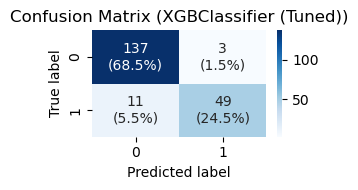

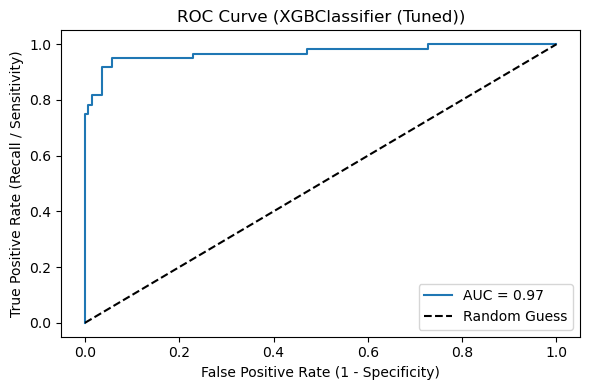

🔹 ROC AUC Score for XGBClassifier (Tuned): 0.9700
📌 Interpretation: Model is doing a good job distinguishing between classes.


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, log_loss
)

# ⚙️ Resolve model name and corresponding grid
model_name = best_model_info["model"].__class__.__name__  # ✅ fixed here
param_grid = param_grids.get(model_name)

if param_grid is None:
    raise ValueError(f"No param grid defined for model: {model_name}")

print(f"\n🔧 Running Grid Search for: {model_name}")

# 🧪 Run Grid Search
model_instance = best_model_info["model"].__class__()

grid_search = GridSearchCV(
    estimator=model_instance,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_tuned_model = grid_search.best_estimator_

print("✅ Best Parameters Found:")
print(grid_search.best_params_)

# 📈 Evaluate tuned model
y_test_pred = best_tuned_model.predict(X_test)

if hasattr(best_tuned_model, "predict_proba"):
    y_scores = best_tuned_model.predict_proba(X_test)[:, 1]
elif hasattr(best_tuned_model, "decision_function"):
    y_scores = best_tuned_model.decision_function(X_test)
else:
    y_scores = y_test_pred

cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
precision = precision_score(y_test, y_test_pred, zero_division=0)
recall = recall_score(y_test, y_test_pred, zero_division=0)
f1 = f1_score(y_test, y_test_pred, zero_division=0)
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_scores)
specificity = tn / (tn + fp)
logloss = log_loss(y_test, y_scores)

# Add to model_results with a new key
model_results[f"{model_name} (Tuned)"] = {
    "model": best_tuned_model,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "auc": auc,
    "specificity": specificity,
    "log_loss": logloss
}

# Evaluation summary
evaluate_model(y_test, y_test_pred, label=name)
plot_confusion(y_test, y_test_pred, model_name=f"{model_name} (Tuned)")
plot_roc_auc(best_tuned_model, X_test, y_test, model_name=f"{model_name} (Tuned)")


In [34]:
# best_model_info

<a id="random-search"></a>
#### 🎲 Randomized Search


<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔍 What is Randomized Search?</h5>

<p>Randomized Search selects a <strong>random subset of combinations</strong> to test, rather than all of them.<br>
It’s faster and often just as effective — especially when only a few hyperparameters really matter.</p>

<ul>
  <li><strong>Pros</strong>: Much faster than grid search, good for large spaces</li>
  <li><strong>Cons</strong>: May miss optimal combo if unlucky</li>
</ul>

</details>



🎲 Running Randomized Search for: XGBClassifier
Fitting 5 folds for each of 15 candidates, totalling 75 fits
✅ Best Parameters Found:
{'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

📊 XGBClassifier (RandomSearch) — Performance Summary:
- Accuracy  :  92.00% → Overall correctness.
- Precision :  89.29% → Of predicted '1', how many were right.
- Recall    :  83.33% → Of actual '1', how many we caught.
- F1 Score  :  86.21% → Balance of precision & recall.

📌 Interpretation:
- Precision looks acceptable; false positives under control.
- Recall is strong; model is catching true cases well.
- F1 Score shows overall tradeoff quality: 0.86


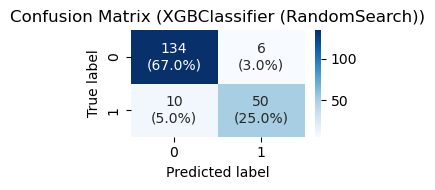

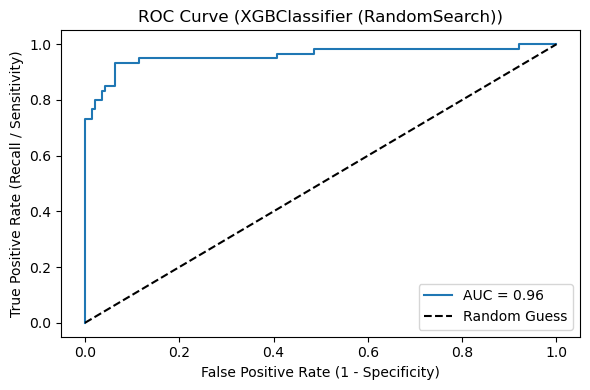

🔹 ROC AUC Score for XGBClassifier (RandomSearch): 0.9594
📌 Interpretation: Model is doing a good job distinguishing between classes.


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, log_loss
)

# 🔁 Use same param grid as defined earlier
model_name = best_model_info["model"].__class__.__name__
param_dist = param_grids.get(model_name)

if param_dist is None:
    raise ValueError(f"No param distribution defined for model: {model_name}")

print(f"\n🎲 Running Randomized Search for: {model_name}")

# Create a new instance of the model
model_instance = best_model_info["model"].__class__()

# 🔍 Run randomized search
random_search = RandomizedSearchCV(
    estimator=model_instance,
    param_distributions=param_dist,
    n_iter=15,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_random_model = random_search.best_estimator_

print("✅ Best Parameters Found:")
print(random_search.best_params_)

# 🔎 Evaluate tuned model
y_test_pred = best_random_model.predict(X_test)

if hasattr(best_random_model, "predict_proba"):
    y_scores = best_random_model.predict_proba(X_test)[:, 1]
elif hasattr(best_random_model, "decision_function"):
    y_scores = best_random_model.decision_function(X_test)
else:
    y_scores = y_test_pred

cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
precision = precision_score(y_test, y_test_pred, zero_division=0)
recall = recall_score(y_test, y_test_pred, zero_division=0)
f1 = f1_score(y_test, y_test_pred, zero_division=0)
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_scores)
specificity = tn / (tn + fp)
logloss = log_loss(y_test, y_scores)

# Store results
model_results[f"{model_name} (RandomSearch)"] = {
    "model": best_random_model,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "auc": auc,
    "specificity": specificity,
    "log_loss": logloss
}

# Visual eval
evaluate_model(y_test, y_test_pred, label=f"{model_name} (RandomSearch)")
plot_confusion(y_test, y_test_pred, model_name=f"{model_name} (RandomSearch)")
plot_roc_auc(best_random_model, X_test, y_test, model_name=f"{model_name} (RandomSearch)")


[Back to the top](#table-of-contents)
___

<a id="ensemble"></a>
# 🔀 Ensemble Methods (Templates)

<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🔀 When Should You Use Ensemble Methods?</h5>

<p>Ensembles are useful when:</p>
<ul>
  <li><strong>Single models plateau</strong> and can’t capture all patterns</li>
  <li>You want to <strong>boost performance</strong> by combining strengths of multiple models</li>
  <li>You observe <strong>inconsistent results</strong> across base models (e.g., one is good at recall, another at precision)</li>
  <li>You need more <strong>robust and stable</strong> predictions across different datasets</li>
</ul>

<p>Use ensembles <strong>after benchmarking individual models</strong> — they add complexity but often yield better generalization.</p>

</details>


<a id="voting-ensemble"></a>
#### 🗳️ Voting Classifier

<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🗳️ What is a Voting Classifier?</h5>

<p>A Voting Classifier combines predictions from multiple different models and makes a final decision based on <strong>majority vote</strong> (for classification) or <strong>average prediction</strong> (for regression).</p>

<p>There are two main types:</p>
<ul>
  <li><strong>Hard Voting</strong>: Chooses the class predicted by the most models.</li>
  <li><strong>Soft Voting</strong>: Averages predicted probabilities and chooses the most likely class.</li>
</ul>

<p>It’s like consulting multiple doctors and going with the consensus.</p>

</details>


🔧 Training: Voting Classifier (hard)


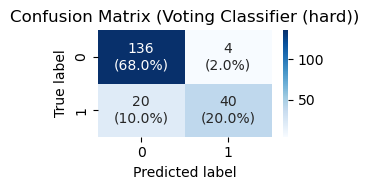


📊 Voting Classifier (hard) — Performance Summary:
- Accuracy  :  88.00% → Overall correctness.
- Precision :  90.91% → Of predicted '1', how many were right.
- Recall    :  66.67% → Of actual '1', how many we caught.
- F1 Score  :  76.92% → Balance of precision & recall.

📌 Interpretation:
- Precision looks acceptable; false positives under control.
- Recall is strong; model is catching true cases well.
- F1 Score shows overall tradeoff quality: 0.77


In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define voting type: 'hard' or 'soft'
voting_type = 'hard'  # change to 'hard' if you want majority voting

# Define the ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier()),
        ('nb', GaussianNB())
    ],
    voting=voting_type
)

# Train the ensemble
print(f"🔧 Training: Voting Classifier ({voting_type})")
voting_clf.fit(X_train, y_train)

# Predict labels
y_pred_voting = voting_clf.predict(X_test)

# Evaluate
plot_confusion(y_test, y_pred_voting, model_name=f"Voting Classifier ({voting_type})")

# Only plot ROC if model supports probability estimates
if voting_type == 'soft':
    plot_roc_auc(voting_clf, X_test, y_test, model_name=f"Voting Classifier ({voting_type})")

evaluate_model(y_test, y_pred_voting, label=f"Voting Classifier ({voting_type})")

<a id="stacking-ensemble"></a>
#### 🧬 Stacking Classifier


<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🧬 What is Stacking?</h5>

<p>Stacking involves training multiple models (called base models), and then using a <strong>meta-model</strong> to learn how to best combine their outputs.</p>

<p><strong>Example:</strong></p>
<ul>
  <li>Base models: logistic regression, decision tree, SVM</li>
  <li>Meta-model: another model that learns which base model to trust more for each kind of input</li>
</ul>

<p>It’s like having specialists give their opinions, and then a generalist makes the final call based on their inputs.</p>

</details>


🔧 Training: Stacking Classifier


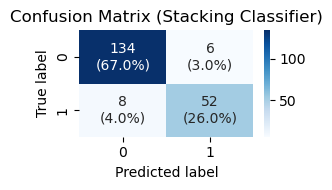

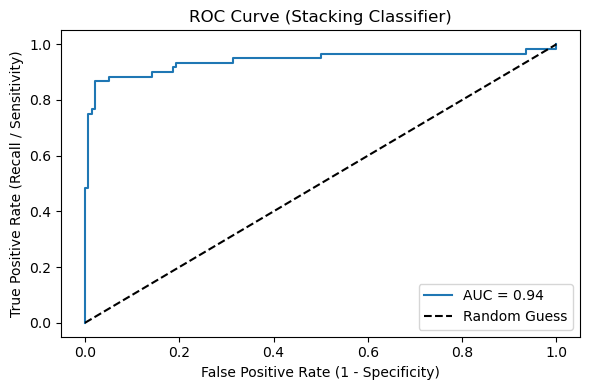

🔹 ROC AUC Score for Stacking Classifier: 0.9404
📌 Interpretation: Model is doing a good job distinguishing between classes.

📊 Stacking Classifier — Performance Summary:
- Accuracy  :  93.00% → Overall correctness.
- Precision :  89.66% → Of predicted '1', how many were right.
- Recall    :  86.67% → Of actual '1', how many we caught.
- F1 Score  :  88.14% → Balance of precision & recall.

📌 Interpretation:
- Precision looks acceptable; false positives under control.
- Recall is strong; model is catching true cases well.
- F1 Score shows overall tradeoff quality: 0.88


In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define base models
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB())
]

# Define meta-model (final estimator)
meta_model = LogisticRegression()

# Build stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=False,  # set to True if you want raw features included in meta-model input
    cv=5                # internal cross-validation
)

# Train the ensemble
print("🔧 Training: Stacking Classifier")
stacking_clf.fit(X_train, y_train)

# Predict labels
y_pred_stack = stacking_clf.predict(X_test)

# Evaluate
plot_confusion(y_test, y_pred_stack, model_name="Stacking Classifier")
plot_roc_auc(stacking_clf, X_test, y_test, model_name="Stacking Classifier")
evaluate_model(y_test, y_pred_stack, label="Stacking Classifier")


<a id="bagging"></a>
#### 🪵 Bagging


<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🪵 What is Bagging?</h5>

<p><strong>Bagging</strong> (Bootstrap Aggregating) builds multiple versions of the same model (e.g., decision trees), each trained on a different random sample of the data.</p>

<p>Then it combines their outputs (usually by voting or averaging) to reduce overfitting and variance.</p>

<p><strong>Random Forest</strong> is a popular example of bagging.</p>

<p>It’s like asking the same expert multiple times under different conditions and averaging their answers.</p>

</details>


🔧 Training: Bagging Classifier


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


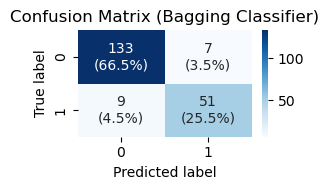

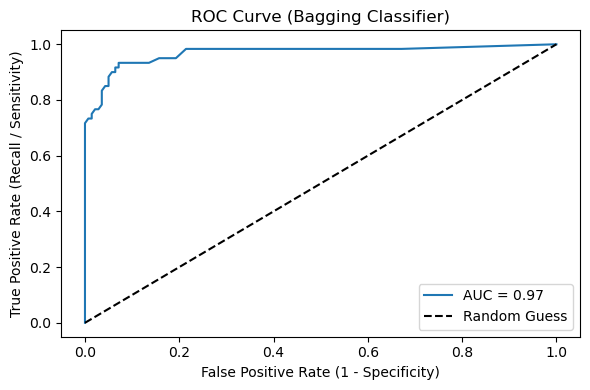

🔹 ROC AUC Score for Bagging Classifier: 0.9685
📌 Interpretation: Model is doing a good job distinguishing between classes.

📊 Bagging Classifier — Performance Summary:
- Accuracy  :  92.00% → Overall correctness.
- Precision :  87.93% → Of predicted '1', how many were right.
- Recall    :  85.00% → Of actual '1', how many we caught.
- F1 Score  :  86.44% → Balance of precision & recall.

📌 Interpretation:
- Precision looks acceptable; false positives under control.
- Recall is strong; model is catching true cases well.
- F1 Score shows overall tradeoff quality: 0.86


In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier            # fast, default
from sklearn.linear_model import LogisticRegression        # works well with linear patterns
from sklearn.neighbors import KNeighborsClassifier         # unstable, benefits a lot from bagging
from sklearn.svm import SVC                                # slow with bagging, use carefully
from sklearn.naive_bayes import GaussianNB                 # rare with bagging (already stable)
from sklearn.ensemble import RandomForestClassifier        # not recommended — it's already bagged

# Example usage:
# base_estimator = LogisticRegression(max_iter=1000)
# base_estimator = KNeighborsClassifier()
# base_estimator = SVC(probability=True)
# base_estimator = GaussianNB()

# Define bagging classifier with decision trees
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,              # number of trees
    max_samples=0.8,              # bootstrap sample size
    max_features=1.0,             # use all features
    random_state=42,
    n_jobs=-1                     # parallel processing
)

# Train the ensemble
print("🔧 Training: Bagging Classifier")
bagging_clf.fit(X_train, y_train)

# Predict
y_pred_bag = bagging_clf.predict(X_test)

# Evaluate
plot_confusion(y_test, y_pred_bag, model_name="Bagging Classifier")
plot_roc_auc(bagging_clf, X_test, y_test, model_name="Bagging Classifier")
evaluate_model(y_test, y_pred_bag, label="Bagging Classifier")

<a id="boosting"></a>
#### 🚀 Boosting

<details><summary><strong>📖 Click to Expand</strong></summary>

<h5>🚀 What is Boosting?</h5>

<p><strong>Boosting</strong> trains models <strong>sequentially</strong> — each new model focuses on correcting the mistakes of the previous one.</p>

<p>It gives more weight to errors and slowly builds a strong overall model by combining many weak ones.</p>

<p>Popular examples: <strong>XGBoost</strong>, <strong>AdaBoost</strong>, <strong>Gradient Boosting</strong></p>

<p>Think of it as building knowledge step by step, learning from past failures to get better over time.</p>

</details>


🔧 Training: Boosting Classifier


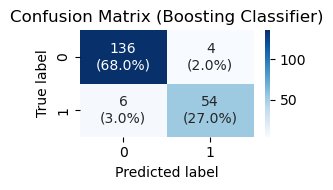

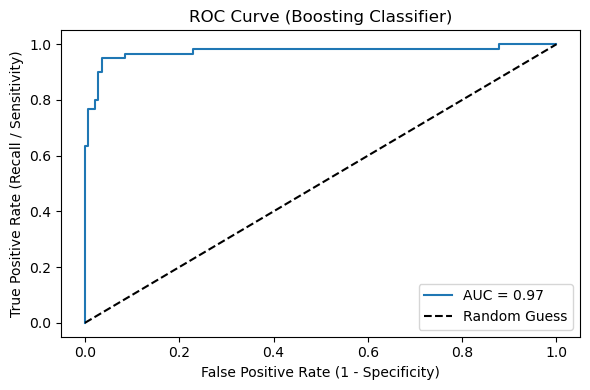

🔹 ROC AUC Score for Boosting Classifier: 0.9738
📌 Interpretation: Model is doing a good job distinguishing between classes.

📊 Boosting Classifier — Performance Summary:
- Accuracy  :  95.00% → Overall correctness.
- Precision :  93.10% → Of predicted '1', how many were right.
- Recall    :  90.00% → Of actual '1', how many we caught.
- F1 Score  :  91.53% → Balance of precision & recall.

📌 Interpretation:
- Precision looks acceptable; false positives under control.
- Recall is strong; model is catching true cases well.
- F1 Score shows overall tradeoff quality: 0.92


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier 

# Define the boosting classifier
boosting_clf = GradientBoostingClassifier(
    n_estimators=100,        # number of boosting rounds
    learning_rate=0.1,       # step size shrinkage
    max_depth=3,             # depth of each weak learner
    subsample=1.0,           # can be <1.0 for stochastic gradient boosting
    random_state=42
)

# Train the ensemble
print("🔧 Training: Boosting Classifier")
boosting_clf.fit(X_train, y_train)

# Predict
y_pred_boost = boosting_clf.predict(X_test)

# Evaluate
plot_confusion(y_test, y_pred_boost, model_name="Boosting Classifier")
plot_roc_auc(boosting_clf, X_test, y_test, model_name="Boosting Classifier")
evaluate_model(y_test, y_pred_boost, label="Boosting Classifier")

[Back to the top](#table-of-contents)
___

<a id="export-deploy"></a>
# 📦 Export & Deployment (Optional)


<details><summary><strong>📖 Click to Expand</strong></summary>

<ul>
  <li>Save the final trained model to disk (e.g., <code>.pkl</code>, <code>.joblib</code>)</li>
  <li>Export final evaluation metrics (e.g., to <code>.json</code> or <code>.csv</code>)</li>
  <li>Package preprocessing steps if applicable (e.g., scalers, encoders)</li>
  <li>Useful for handing off, sharing, or production integration</li>
</ul>

</details>

<a id="pickling"></a>
#### 🧊 Pickling (Model Export)


In [40]:
import joblib
import json
import os

export=False
if export:
    # 📦 Create export folder if it doesn't exist
    os.makedirs("export", exist_ok=True)

    # 💾 Save the best model
    joblib.dump(best_model, "export/best_model.joblib")

    # 🧮 Prepare and save the evaluation metrics (exclude the model object)
    metrics_copy = {k: v for k, v in model_results[best_model_name].items() if k != "model"}
    with open("export/metrics.json", "w") as f:
        json.dump(metrics_copy, f, indent=2)

    print("✅ Model and metrics exported to /export/")


<a id="monitoring-hooks"></a>
#### 📊 Monitoring Hooks (Production Logging)

<details><summary><strong>📖 Click to Expand</strong></summary>

<p>In real-world deployments, it’s crucial to track how your model behaves once it’s live.</p>

<p><strong>What to log in production:</strong></p>
<ul>
  <li>✅ Number of predictions served</li>
  <li>✅ Confidence scores / prediction probabilities</li>
  <li>✅ Class distribution over time</li>
  <li>✅ Drift in input features</li>
  <li>✅ Model response latency</li>
  <li>❌ Ground truth (usually delayed or unavailable)</li>
</ul>

<p>You can integrate this with tools like:</p>
<ul>
  <li>Prometheus + Grafana</li>
  <li>AWS CloudWatch</li>
  <li>Datadog</li>
  <li>MLflow, EvidentlyAI, or WhyLabs</li>
</ul>

</details>


[Back to the top](#table-of-contents)
___